In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from wordcloud import WordCloud, STOPWORDS

# GENRE DATASET

In [2]:
df_genre=pd.read_csv("Genre_df.csv")
df_genre.head()

Title  Number of Sub-genres  \
0                    Action & Adventure                     0   
1              Arts, Film & Photography                    11   
2  Biographies, Diaries & True Accounts                     3   
3                  Business & Economics                     4   
4                      Children's Books                    34   

                                                 URL  
0  https://www.amazon.in/gp/bestsellers/books/131...  
1  https://www.amazon.in/gp/bestsellers/books/131...  
2  https://www.amazon.in/gp/bestsellers/books/131...  
3  https://www.amazon.in/gp/bestsellers/books/131...  
4  https://www.amazon.in/gp/bestsellers/books/646...

In [3]:
df_genre.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Title                 35 non-null     object
 1   Number of Sub-genres  35 non-null     int64 
 2   URL                   35 non-null     object
dtypes: int64(1), object(2)
memory usage: 972.0+ bytes


In [4]:
df_genre[df_genre.duplicated()]

Empty DataFrame
Columns: [Title, Number of Sub-genres, URL]
Index: []

In [5]:
pd.DataFrame(df_genre["Title"].value_counts())

count
Title                                       
Action & Adventure                         1
Romance                                    1
Literature & Fiction                       1
Maps & Atlases                             1
Medicine & Health Sciences                 1
Politics                                   1
Reference                                  1
Religion                                   1
School Books                               1
Language, Linguistics & Writing            1
Science & Mathematics                      1
Sciences, Technology & Medicine            1
Society & Social Sciences                  1
Sports                                     1
Teen & Young Adult                         1
Textbooks & Study Guides                   1
Law                                        1
Humour                                     1
Arts, Film & Photography                   1
Crime, Thriller & Mystery                  1
Biographies, Diaries & True Accounts       1
Business & Economics                       1
Children's Books                           1
Comics & Mangas                            1
Computing, Internet & Digital Media        1
Crafts, Home & Lifestyle                   1
Engineering                                1
History                                    1
Exam Preparation                           1
Fantasy, Horror & Science Fiction          1
Health, Family & Personal Development      1
Health, Fitness & Nutrition                1
Higher Education Textbooks                 1
Historical Fiction                         1
Travel                                     1

# SUB GENRE DATASET

In [6]:
df_sub_genre=pd.read_csv("Sub_Genre_df.csv")
df_sub_genre.head()

Title                Main Genre  No. of Books  \
0         Architecture  Arts, Film & Photography         100.0   
1   Cinema & Broadcast  Arts, Film & Photography         100.0   
2                Dance  Arts, Film & Photography         100.0   
3     Design & Fashion  Arts, Film & Photography         100.0   
4  Museums & Museology  Arts, Film & Photography         100.0   

                                                URLs  
0  https://www.amazon.in/gp/bestsellers/books/131...  
1  https://www.amazon.in/gp/bestsellers/books/131...  
2  https://www.amazon.in/gp/bestsellers/books/131...  
3  https://www.amazon.in/gp/bestsellers/books/131...  
4  https://www.amazon.in/gp/bestsellers/books/131...

In [7]:
df_sub_genre.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 329 entries, 0 to 328
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Title         329 non-null    object 
 1   Main Genre    329 non-null    object 
 2   No. of Books  329 non-null    float64
 3   URLs          329 non-null    object 
dtypes: float64(1), object(3)
memory usage: 10.4+ KB


In [8]:
pd.DataFrame(df_sub_genre.isnull().sum(),columns=["No of missing values"])

No of missing values
Title                            0
Main Genre                       0
No. of Books                     0
URLs                             0

In [9]:
pd.DataFrame(df_sub_genre["Title"].value_counts())

count
Title                            
Reference                       3
Fantasy                         3
Action & Adventure              3
Biology & Life Sciences         2
History                         2
...                           ...
Addiction & Recovery            1
Business & Finance              1
Communication & Journalism      1
Engineering Textbooks           1
Travel & Holiday Guides         1

[302 rows x 1 columns]

# BOOKS DATASET

In [10]:
df_book=pd.read_csv("Books_df.csv")
df_book.head()

Unnamed: 0                                              Title  \
0           0              The Complete Novel of Sherlock Holmes   
1           1  Black Holes (L) : The Reith Lectures [Paperbac...   
2           2                                    The Kite Runner   
3           3  Greenlights: Raucous stories and outlaw wisdom...   
4           4  The Science of Storytelling: Why Stories Make ...   

                Author                Main Genre           Sub Genre  \
0   Arthur Conan Doyle  Arts, Film & Photography  Cinema & Broadcast   
1      Stephen Hawking  Arts, Film & Photography  Cinema & Broadcast   
2      Khaled Hosseini  Arts, Film & Photography  Cinema & Broadcast   
3  Matthew McConaughey  Arts, Film & Photography  Cinema & Broadcast   
4           Will Storr  Arts, Film & Photography  Cinema & Broadcast   

             Type    Price  Rating  No. of People rated  \
0       Paperback  ₹169.00     4.4              19923.0   
1       Paperback   ₹99.00     4.5               7686.0   
2  Kindle Edition  ₹175.75     4.6              50016.0   
3       Paperback  ₹389.00     4.6              32040.0   
4       Paperback  ₹348.16     4.5               1707.0   

                                                URLs  
0  https://www.amazon.in/Complete-Novels-Sherlock...  
1  https://www.amazon.in/Black-Holes-Lectures-Ste...  
2  https://www.amazon.in/Kite-Runner-Khaled-Hosse...  
3  https://www.amazon.in/Greenlights-Raucous-stor...  
4  https://www.amazon.in/Science-Storytelling-Wil...

In [11]:
df_book.drop(['Unnamed: 0'],axis=1,inplace=True)

In [12]:
df_book.head()

Title               Author  \
0              The Complete Novel of Sherlock Holmes   Arthur Conan Doyle   
1  Black Holes (L) : The Reith Lectures [Paperbac...      Stephen Hawking   
2                                    The Kite Runner      Khaled Hosseini   
3  Greenlights: Raucous stories and outlaw wisdom...  Matthew McConaughey   
4  The Science of Storytelling: Why Stories Make ...           Will Storr   

                 Main Genre           Sub Genre            Type    Price  \
0  Arts, Film & Photography  Cinema & Broadcast       Paperback  ₹169.00   
1  Arts, Film & Photography  Cinema & Broadcast       Paperback   ₹99.00   
2  Arts, Film & Photography  Cinema & Broadcast  Kindle Edition  ₹175.75   
3  Arts, Film & Photography  Cinema & Broadcast       Paperback  ₹389.00   
4  Arts, Film & Photography  Cinema & Broadcast       Paperback  ₹348.16   

   Rating  No. of People rated  \
0     4.4              19923.0   
1     4.5               7686.0   
2     4.6              50016.0   
3     4.6              32040.0   
4     4.5               1707.0   

                                                URLs  
0  https://www.amazon.in/Complete-Novels-Sherlock...  
1  https://www.amazon.in/Black-Holes-Lectures-Ste...  
2  https://www.amazon.in/Kite-Runner-Khaled-Hosse...  
3  https://www.amazon.in/Greenlights-Raucous-stor...  
4  https://www.amazon.in/Science-Storytelling-Wil...

In [13]:
df_book.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7928 entries, 0 to 7927
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Title                7928 non-null   object 
 1   Author               7907 non-null   object 
 2   Main Genre           7928 non-null   object 
 3   Sub Genre            7928 non-null   object 
 4   Type                 7928 non-null   object 
 5   Price                7928 non-null   object 
 6   Rating               7928 non-null   float64
 7   No. of People rated  7928 non-null   float64
 8   URLs                 7928 non-null   object 
dtypes: float64(2), object(7)
memory usage: 557.6+ KB


In [14]:
new1=pd.DataFrame(round(df_book.isnull().sum()/len(df_book)*100,2),columns=["percentage of missing values"])
new2=pd.DataFrame(df_book.isnull().sum(),columns=["No of missing values"])
new3=pd.concat([new2,new1],axis=1)
new3

No of missing values  percentage of missing values
Title                                   0                          0.00
Author                                 21                          0.26
Main Genre                              0                          0.00
Sub Genre                               0                          0.00
Type                                    0                          0.00
Price                                   0                          0.00
Rating                                  0                          0.00
No. of People rated                     0                          0.00
URLs                                    0                          0.00

Since the percentage of missing value at the Author column is very negligible , we can drop it

In [15]:
df_book['Author'].fillna('Unknown', inplace=True)

In [16]:
df_book.head()

Title               Author  \
0              The Complete Novel of Sherlock Holmes   Arthur Conan Doyle   
1  Black Holes (L) : The Reith Lectures [Paperbac...      Stephen Hawking   
2                                    The Kite Runner      Khaled Hosseini   
3  Greenlights: Raucous stories and outlaw wisdom...  Matthew McConaughey   
4  The Science of Storytelling: Why Stories Make ...           Will Storr   

                 Main Genre           Sub Genre            Type    Price  \
0  Arts, Film & Photography  Cinema & Broadcast       Paperback  ₹169.00   
1  Arts, Film & Photography  Cinema & Broadcast       Paperback   ₹99.00   
2  Arts, Film & Photography  Cinema & Broadcast  Kindle Edition  ₹175.75   
3  Arts, Film & Photography  Cinema & Broadcast       Paperback  ₹389.00   
4  Arts, Film & Photography  Cinema & Broadcast       Paperback  ₹348.16   

   Rating  No. of People rated  \
0     4.4              19923.0   
1     4.5               7686.0   
2     4.6              50016.0   
3     4.6              32040.0   
4     4.5               1707.0   

                                                URLs  
0  https://www.amazon.in/Complete-Novels-Sherlock...  
1  https://www.amazon.in/Black-Holes-Lectures-Ste...  
2  https://www.amazon.in/Kite-Runner-Khaled-Hosse...  
3  https://www.amazon.in/Greenlights-Raucous-stor...  
4  https://www.amazon.in/Science-Storytelling-Wil...

In [17]:
df_book["Price"]=df_book["Price"].apply(lambda x:x.split("₹")[1])
df_book["Price"]=df_book["Price"].apply(lambda x:x.replace(",",""))
df_book["Price"]=df_book["Price"].apply(lambda x:float(x))
df_book["No. of People rated"]=df_book["No. of People rated"].apply(lambda x:int(x))

In [18]:
df_book.head()

Title               Author  \
0              The Complete Novel of Sherlock Holmes   Arthur Conan Doyle   
1  Black Holes (L) : The Reith Lectures [Paperbac...      Stephen Hawking   
2                                    The Kite Runner      Khaled Hosseini   
3  Greenlights: Raucous stories and outlaw wisdom...  Matthew McConaughey   
4  The Science of Storytelling: Why Stories Make ...           Will Storr   

                 Main Genre           Sub Genre            Type   Price  \
0  Arts, Film & Photography  Cinema & Broadcast       Paperback  169.00   
1  Arts, Film & Photography  Cinema & Broadcast       Paperback   99.00   
2  Arts, Film & Photography  Cinema & Broadcast  Kindle Edition  175.75   
3  Arts, Film & Photography  Cinema & Broadcast       Paperback  389.00   
4  Arts, Film & Photography  Cinema & Broadcast       Paperback  348.16   

   Rating  No. of People rated  \
0     4.4                19923   
1     4.5                 7686   
2     4.6                50016   
3     4.6                32040   
4     4.5                 1707   

                                                URLs  
0  https://www.amazon.in/Complete-Novels-Sherlock...  
1  https://www.amazon.in/Black-Holes-Lectures-Ste...  
2  https://www.amazon.in/Kite-Runner-Khaled-Hosse...  
3  https://www.amazon.in/Greenlights-Raucous-stor...  
4  https://www.amazon.in/Science-Storytelling-Wil...

In [19]:
# Define a function to detect outliers based on the IQR method
def detect_outliers_iqr(data, feature):
    Q1 = data[feature].quantile(0.25)
    Q3 = data[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = data[(data[feature] < lower_bound) | (data[feature] > upper_bound)]
    return outliers, lower_bound, upper_bound

# Detect outliers for 'Price'
price_outliers, price_lb, price_ub = detect_outliers_iqr(df_book, 'Price')

# Detect outliers for 'No. of People rated'
rating_outliers, rating_lb, rating_ub = detect_outliers_iqr(df_book, 'No. of People rated')

# Summary of outliers detected
outliers_summary = {
    'Price': {
        'Number of Outliers': price_outliers.shape[0],
        'Lower Bound': price_lb,
        'Upper Bound': price_ub
    },
    'No. of People rated': {
        'Number of Outliers': rating_outliers.shape[0],
        'Lower Bound': rating_lb,
        'Upper Bound': rating_ub
    }
}

outliers_summary

{'Price': {'Number of Outliers': 810,
  'Lower Bound': -211.51,
  'Upper Bound': 869.8499999999999},
 'No. of People rated': {'Number of Outliers': 1233,
  'Lower Bound': -4200.375,
  'Upper Bound': 7168.625}}

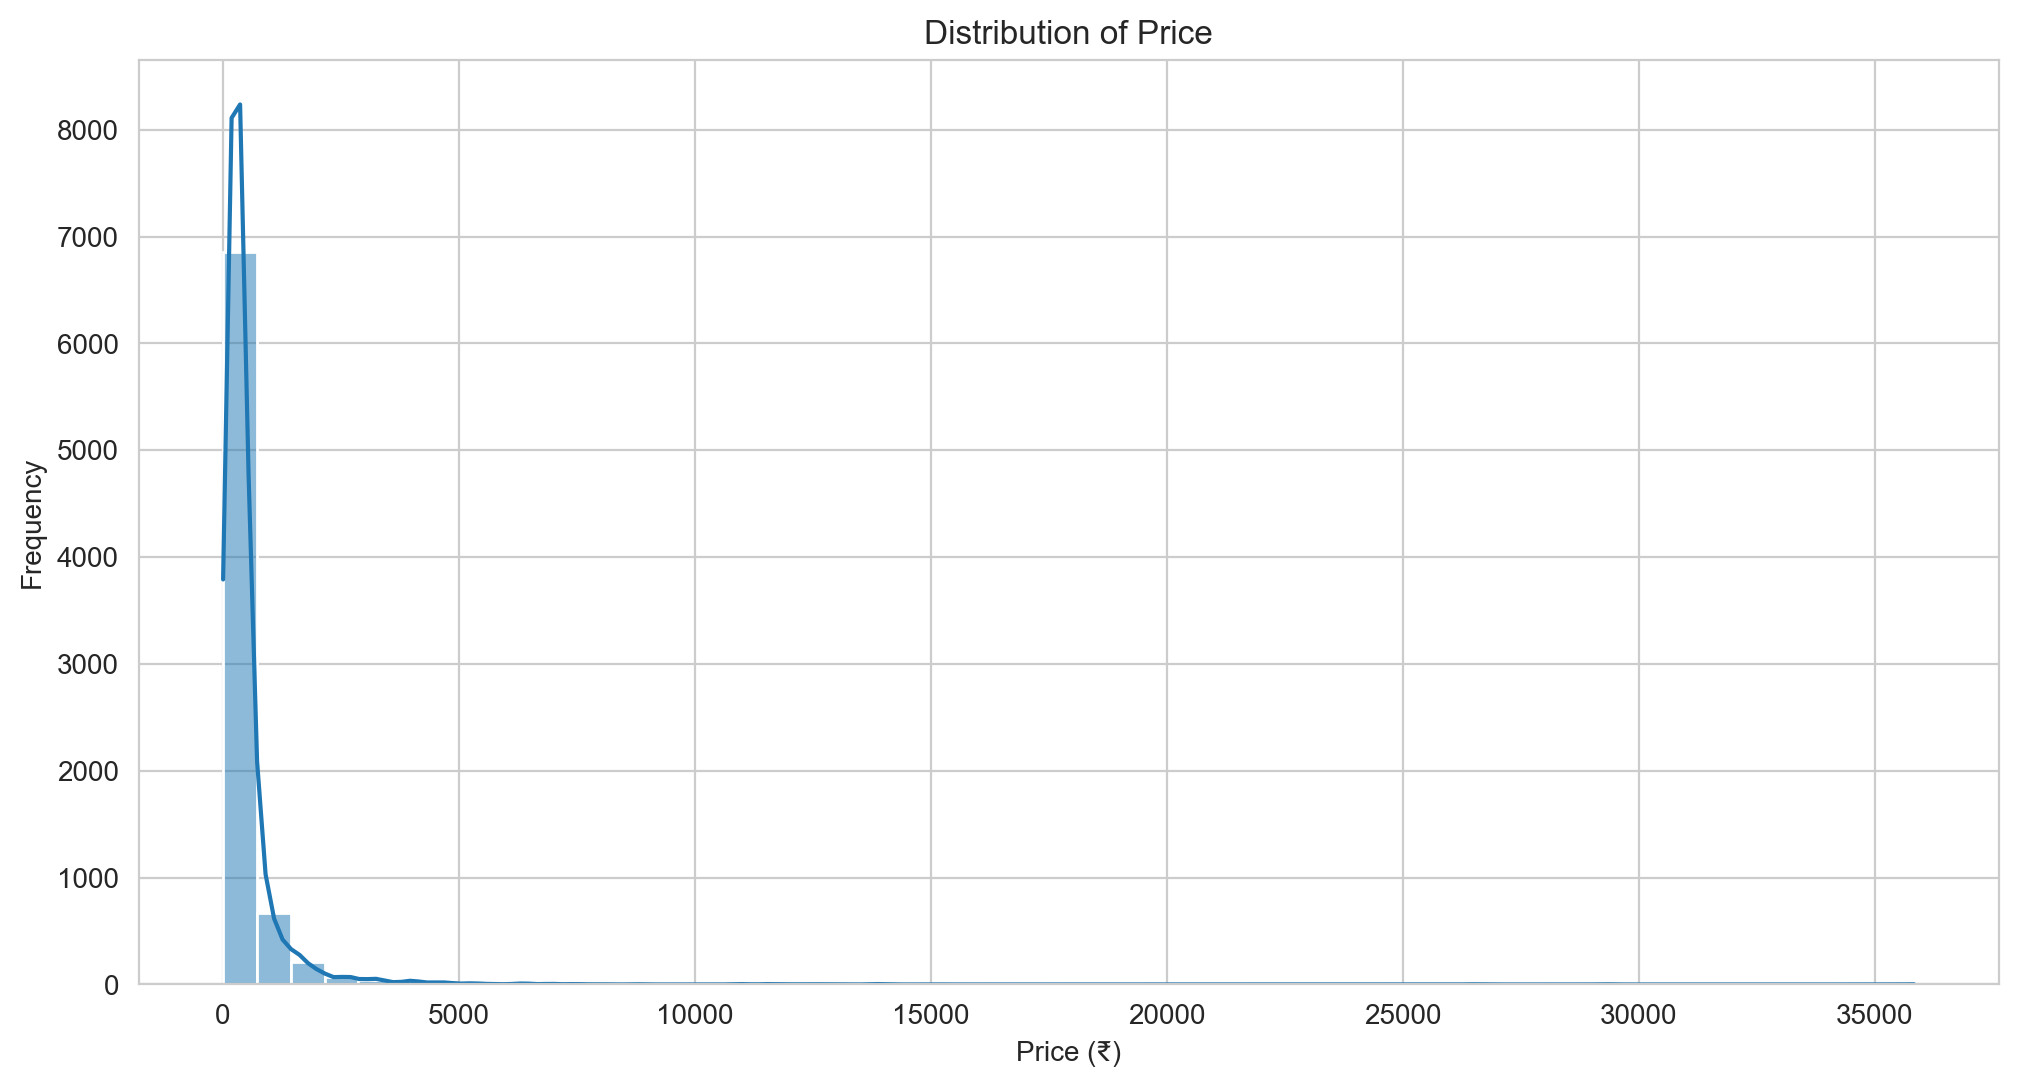

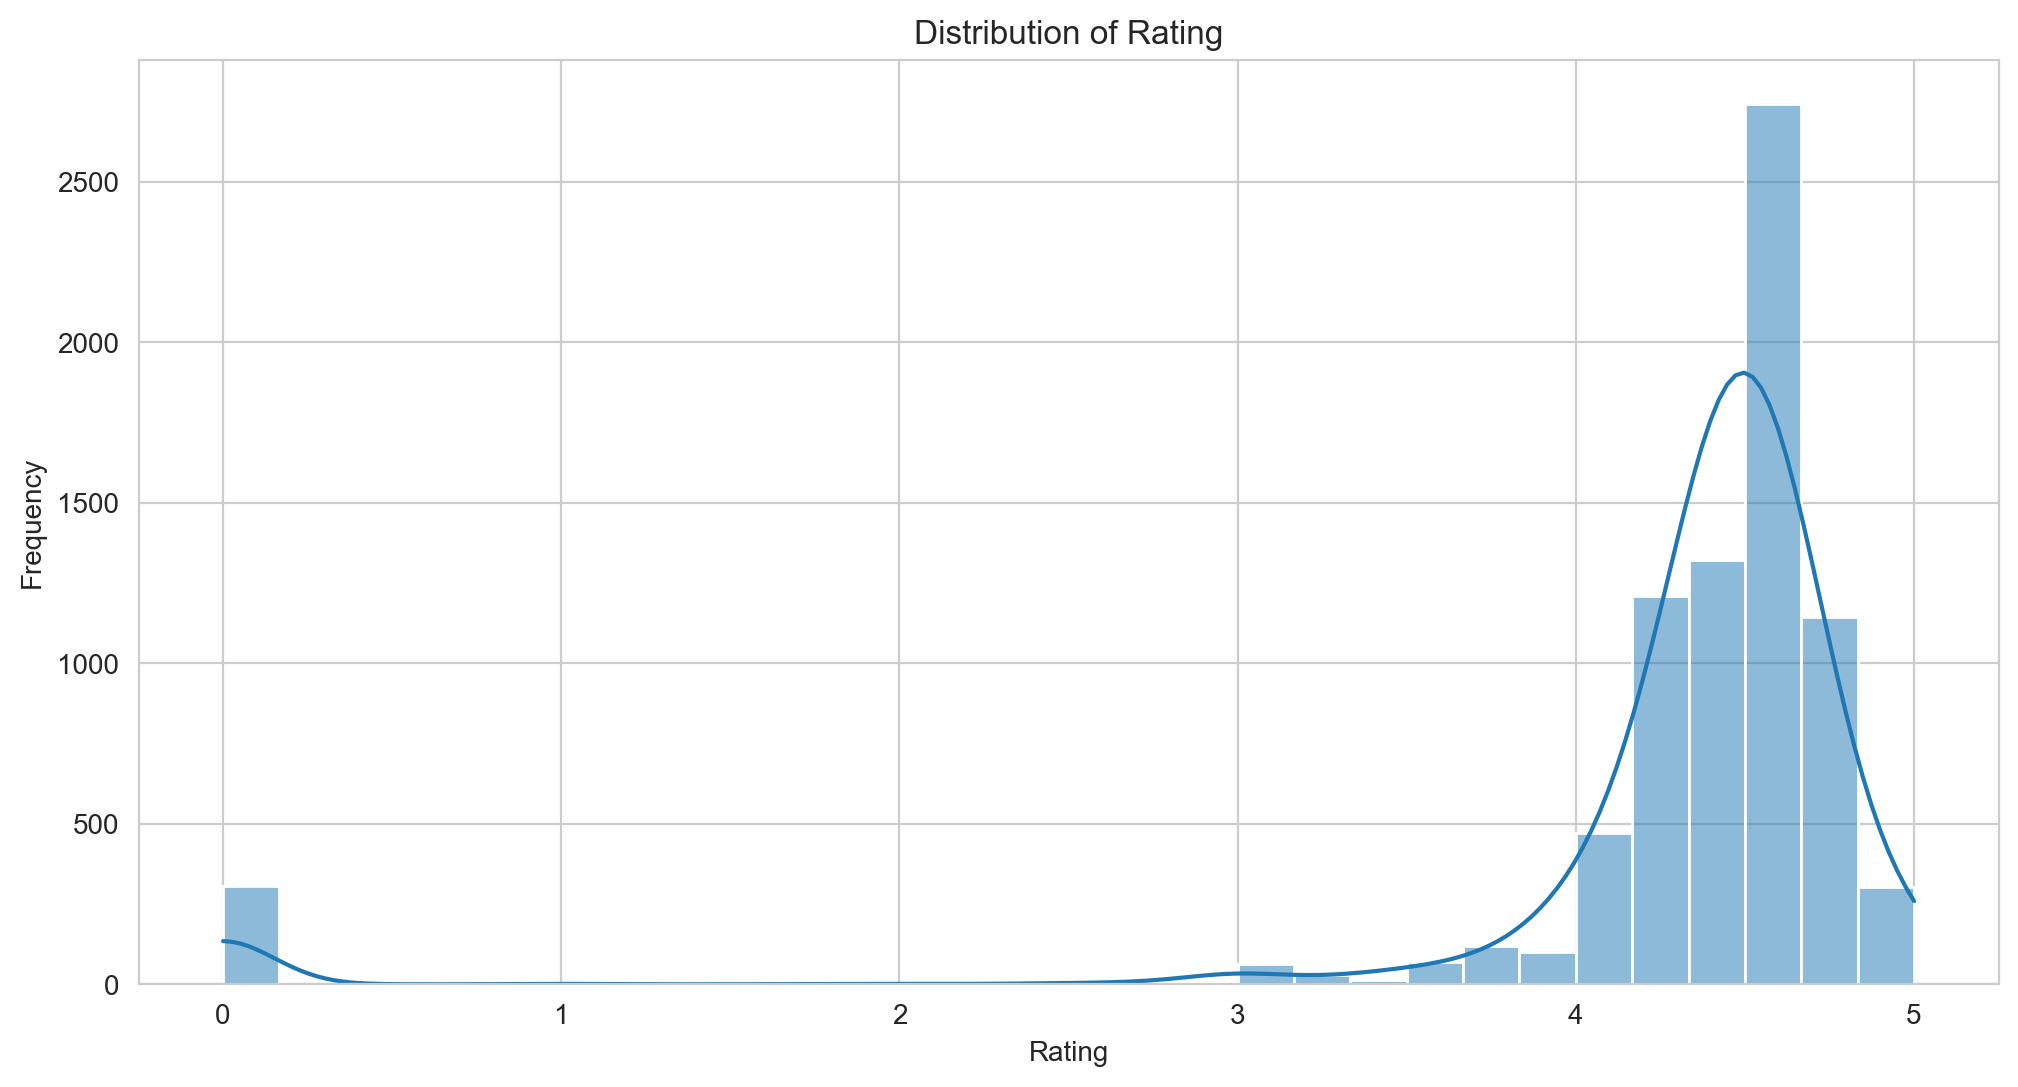

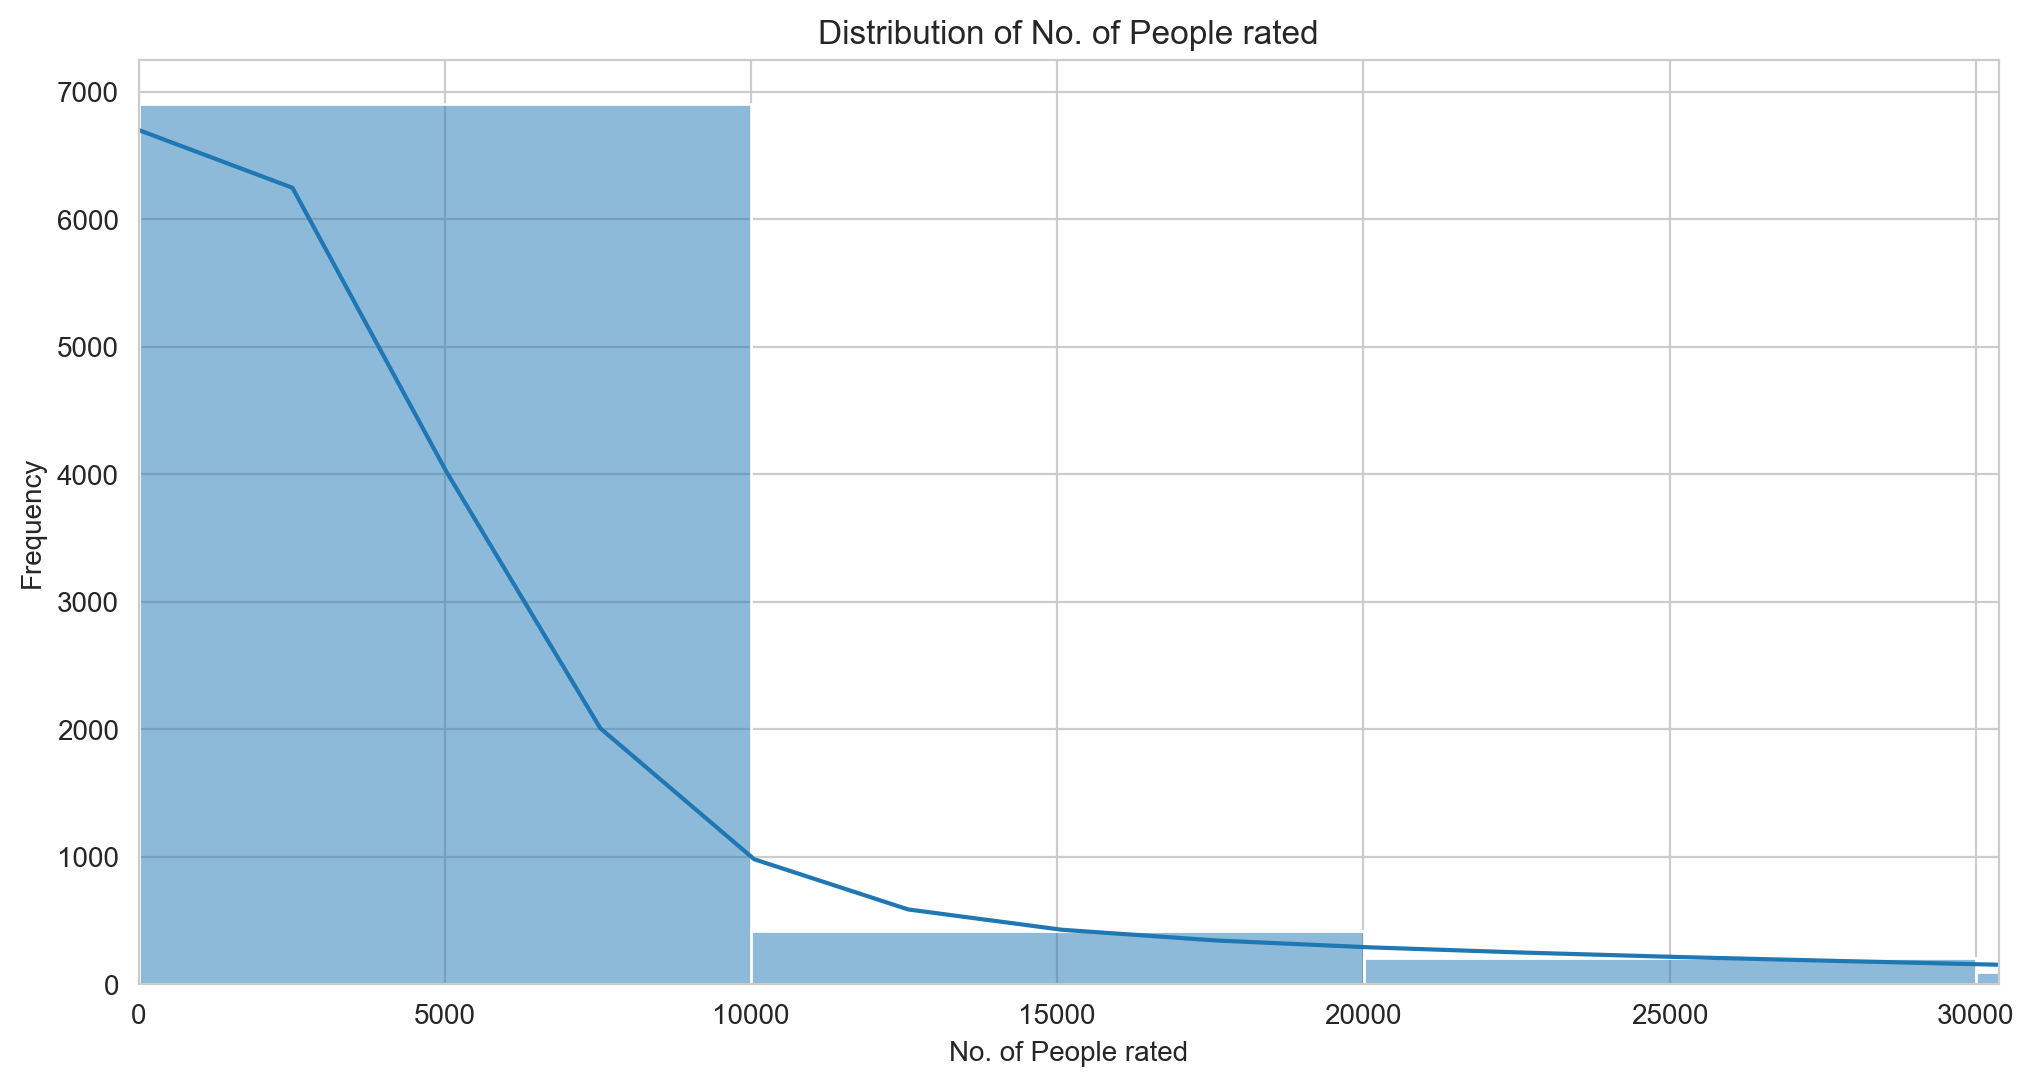

In [20]:
# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Distribution of 'Price'
plt.figure(figsize=(12, 6), dpi=200)
sns.histplot(df_book['Price'], bins=50, kde=True)
plt.title('Distribution of Price')
plt.xlabel('Price (₹)')
plt.ylabel('Frequency')
plt.show()

# Distribution of 'Rating'
plt.figure(figsize=(12, 6), dpi=200)
sns.histplot(df_book['Rating'], bins=30, kde=True)
plt.title('Distribution of Rating')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

# Distribution of 'No. of People rated'
plt.figure(figsize=(12, 6), dpi=200)
sns.histplot(df_book['No. of People rated'], bins=50, kde=True)
plt.title('Distribution of No. of People rated')
plt.xlabel('No. of People rated')
plt.ylabel('Frequency')
plt.xlim(0, df_book['No. of People rated'].quantile(0.95)) # Limiting x-axis to 95th percentile for better visualization
plt.show()



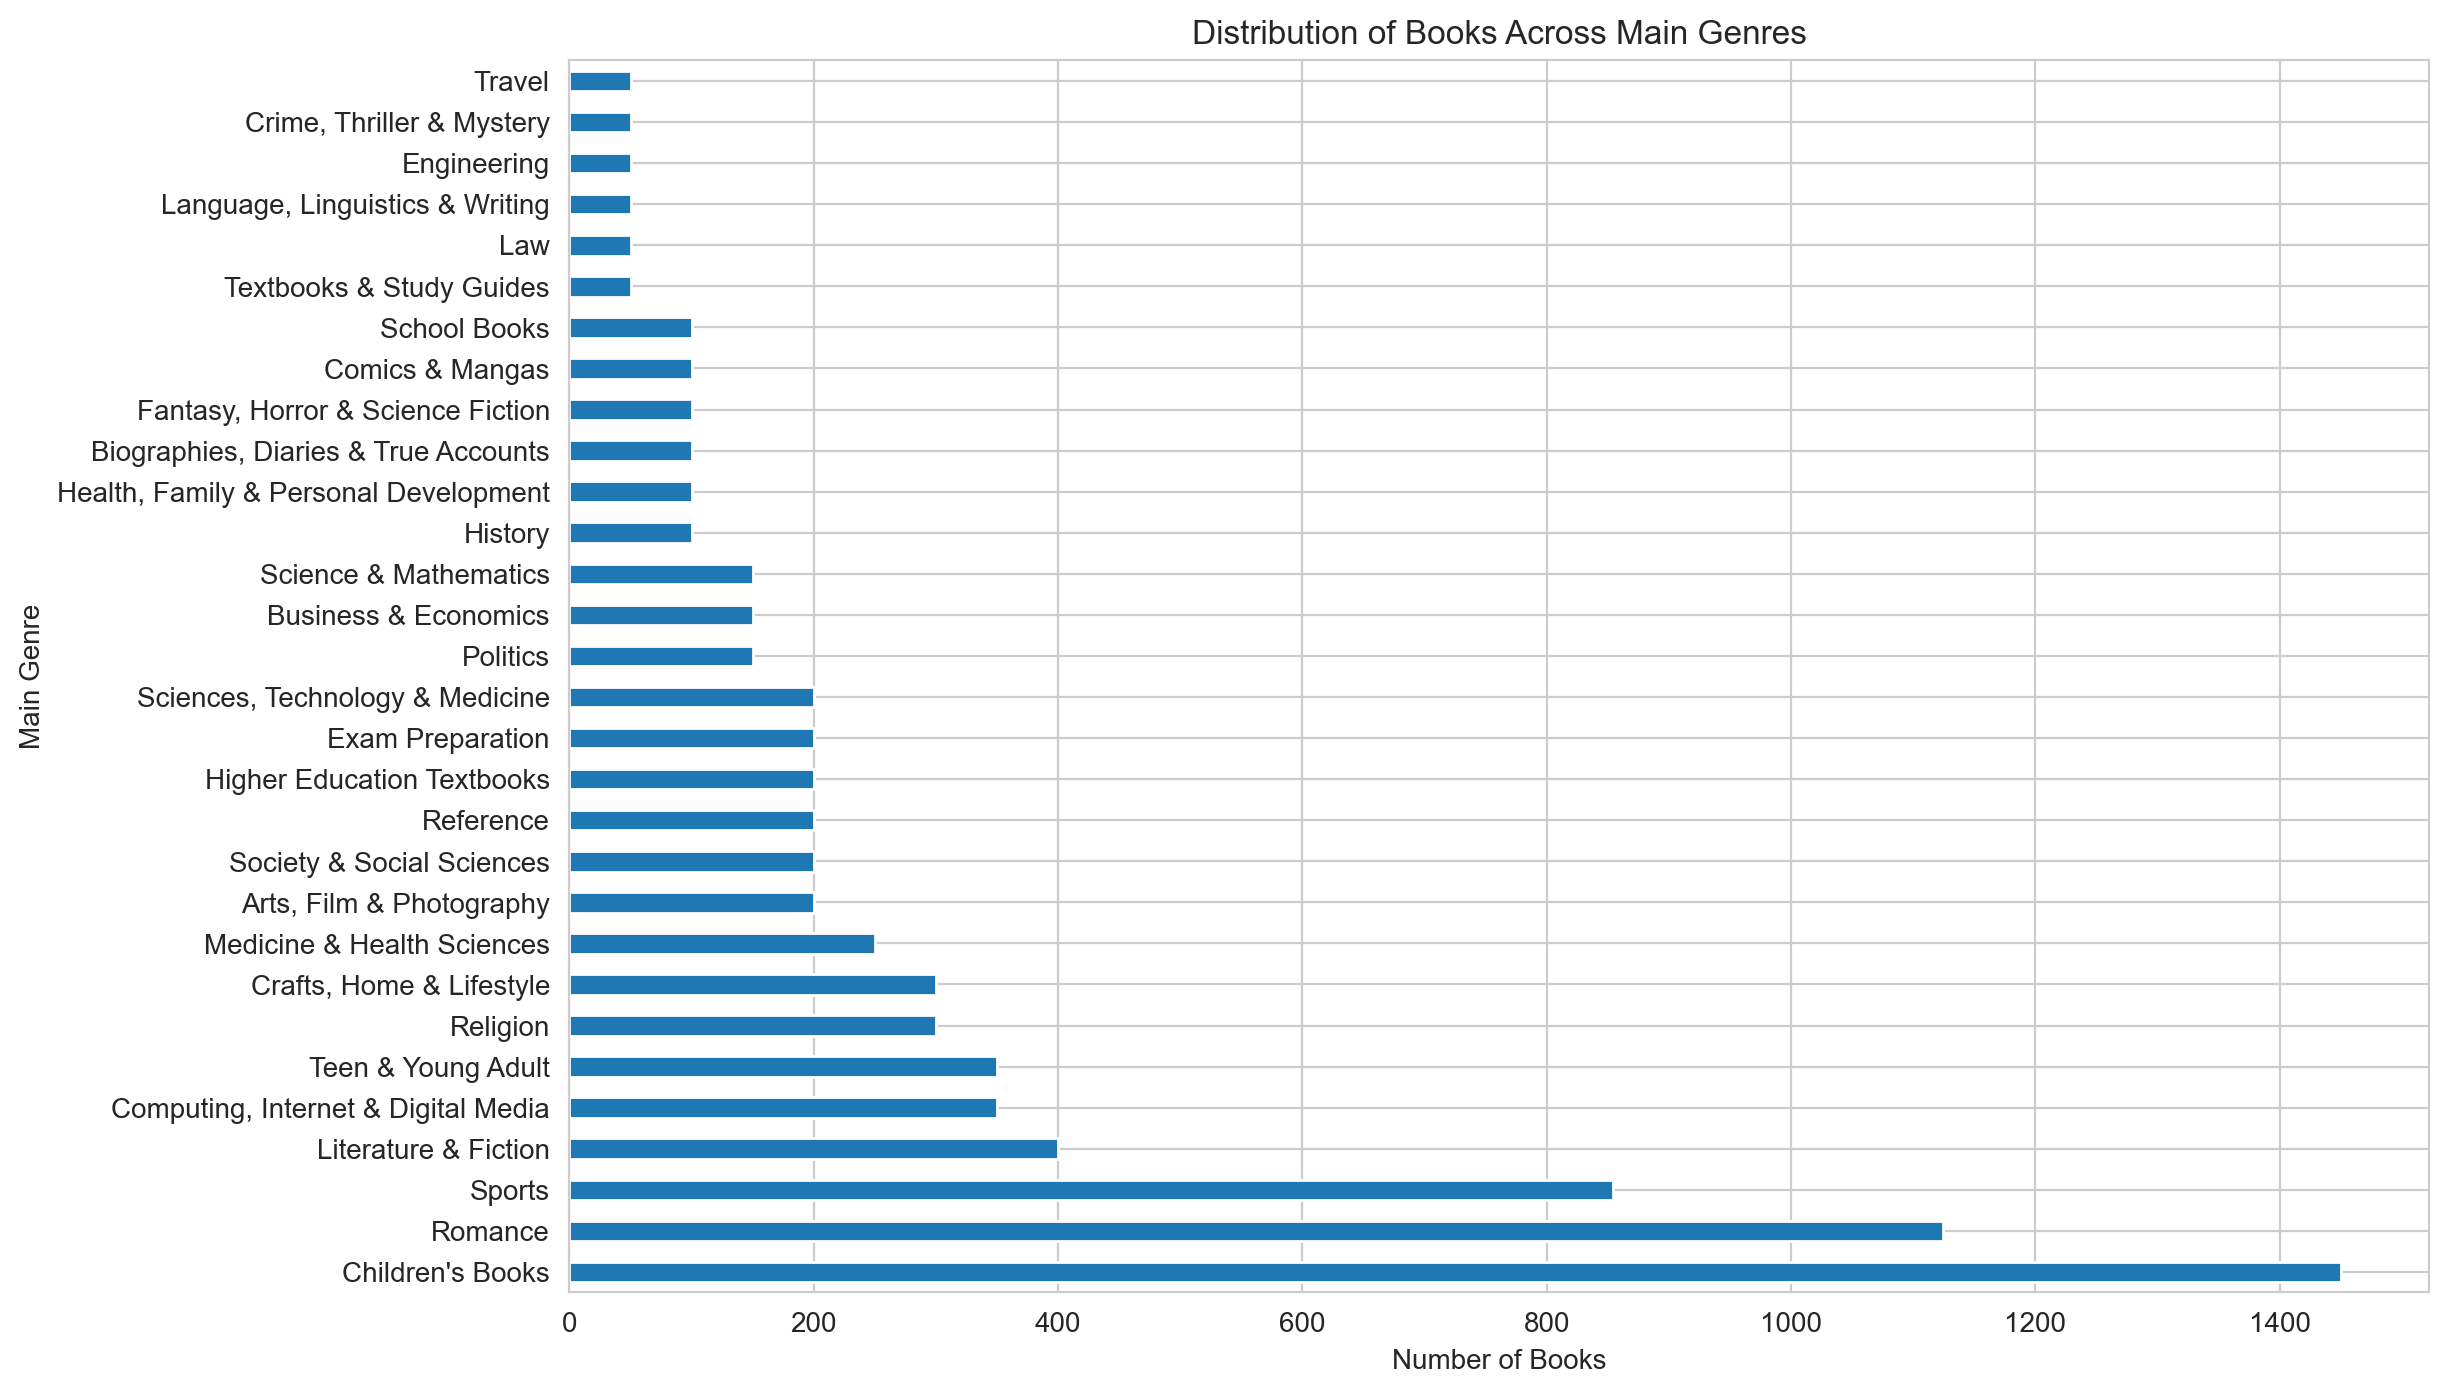

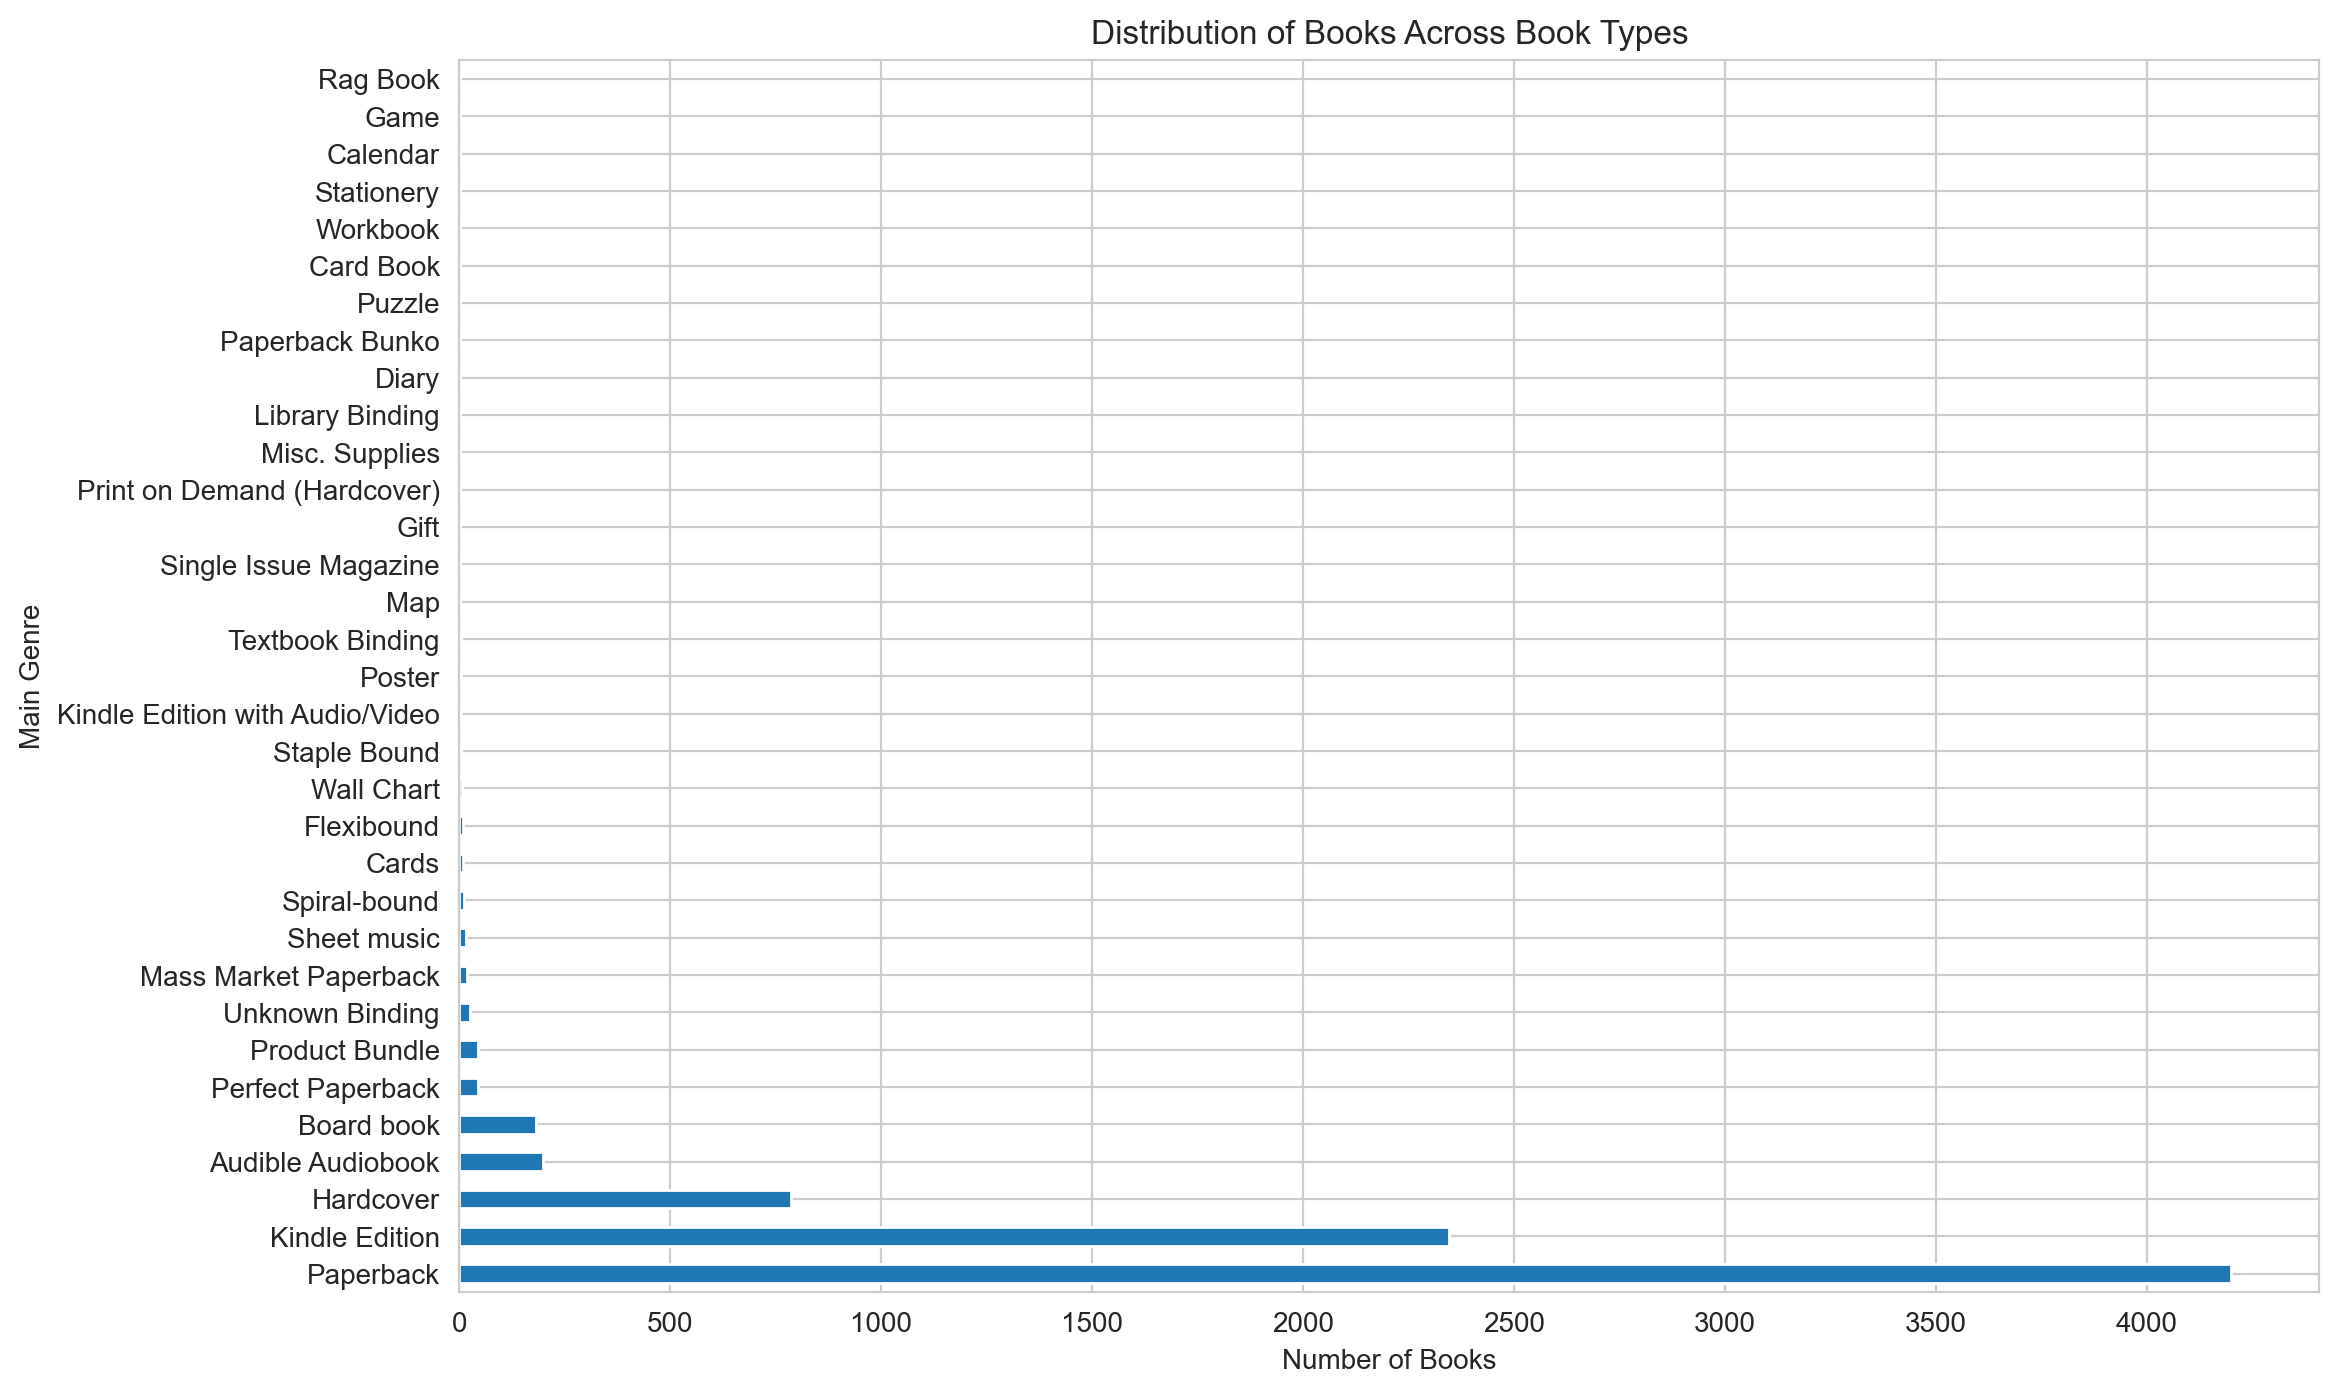

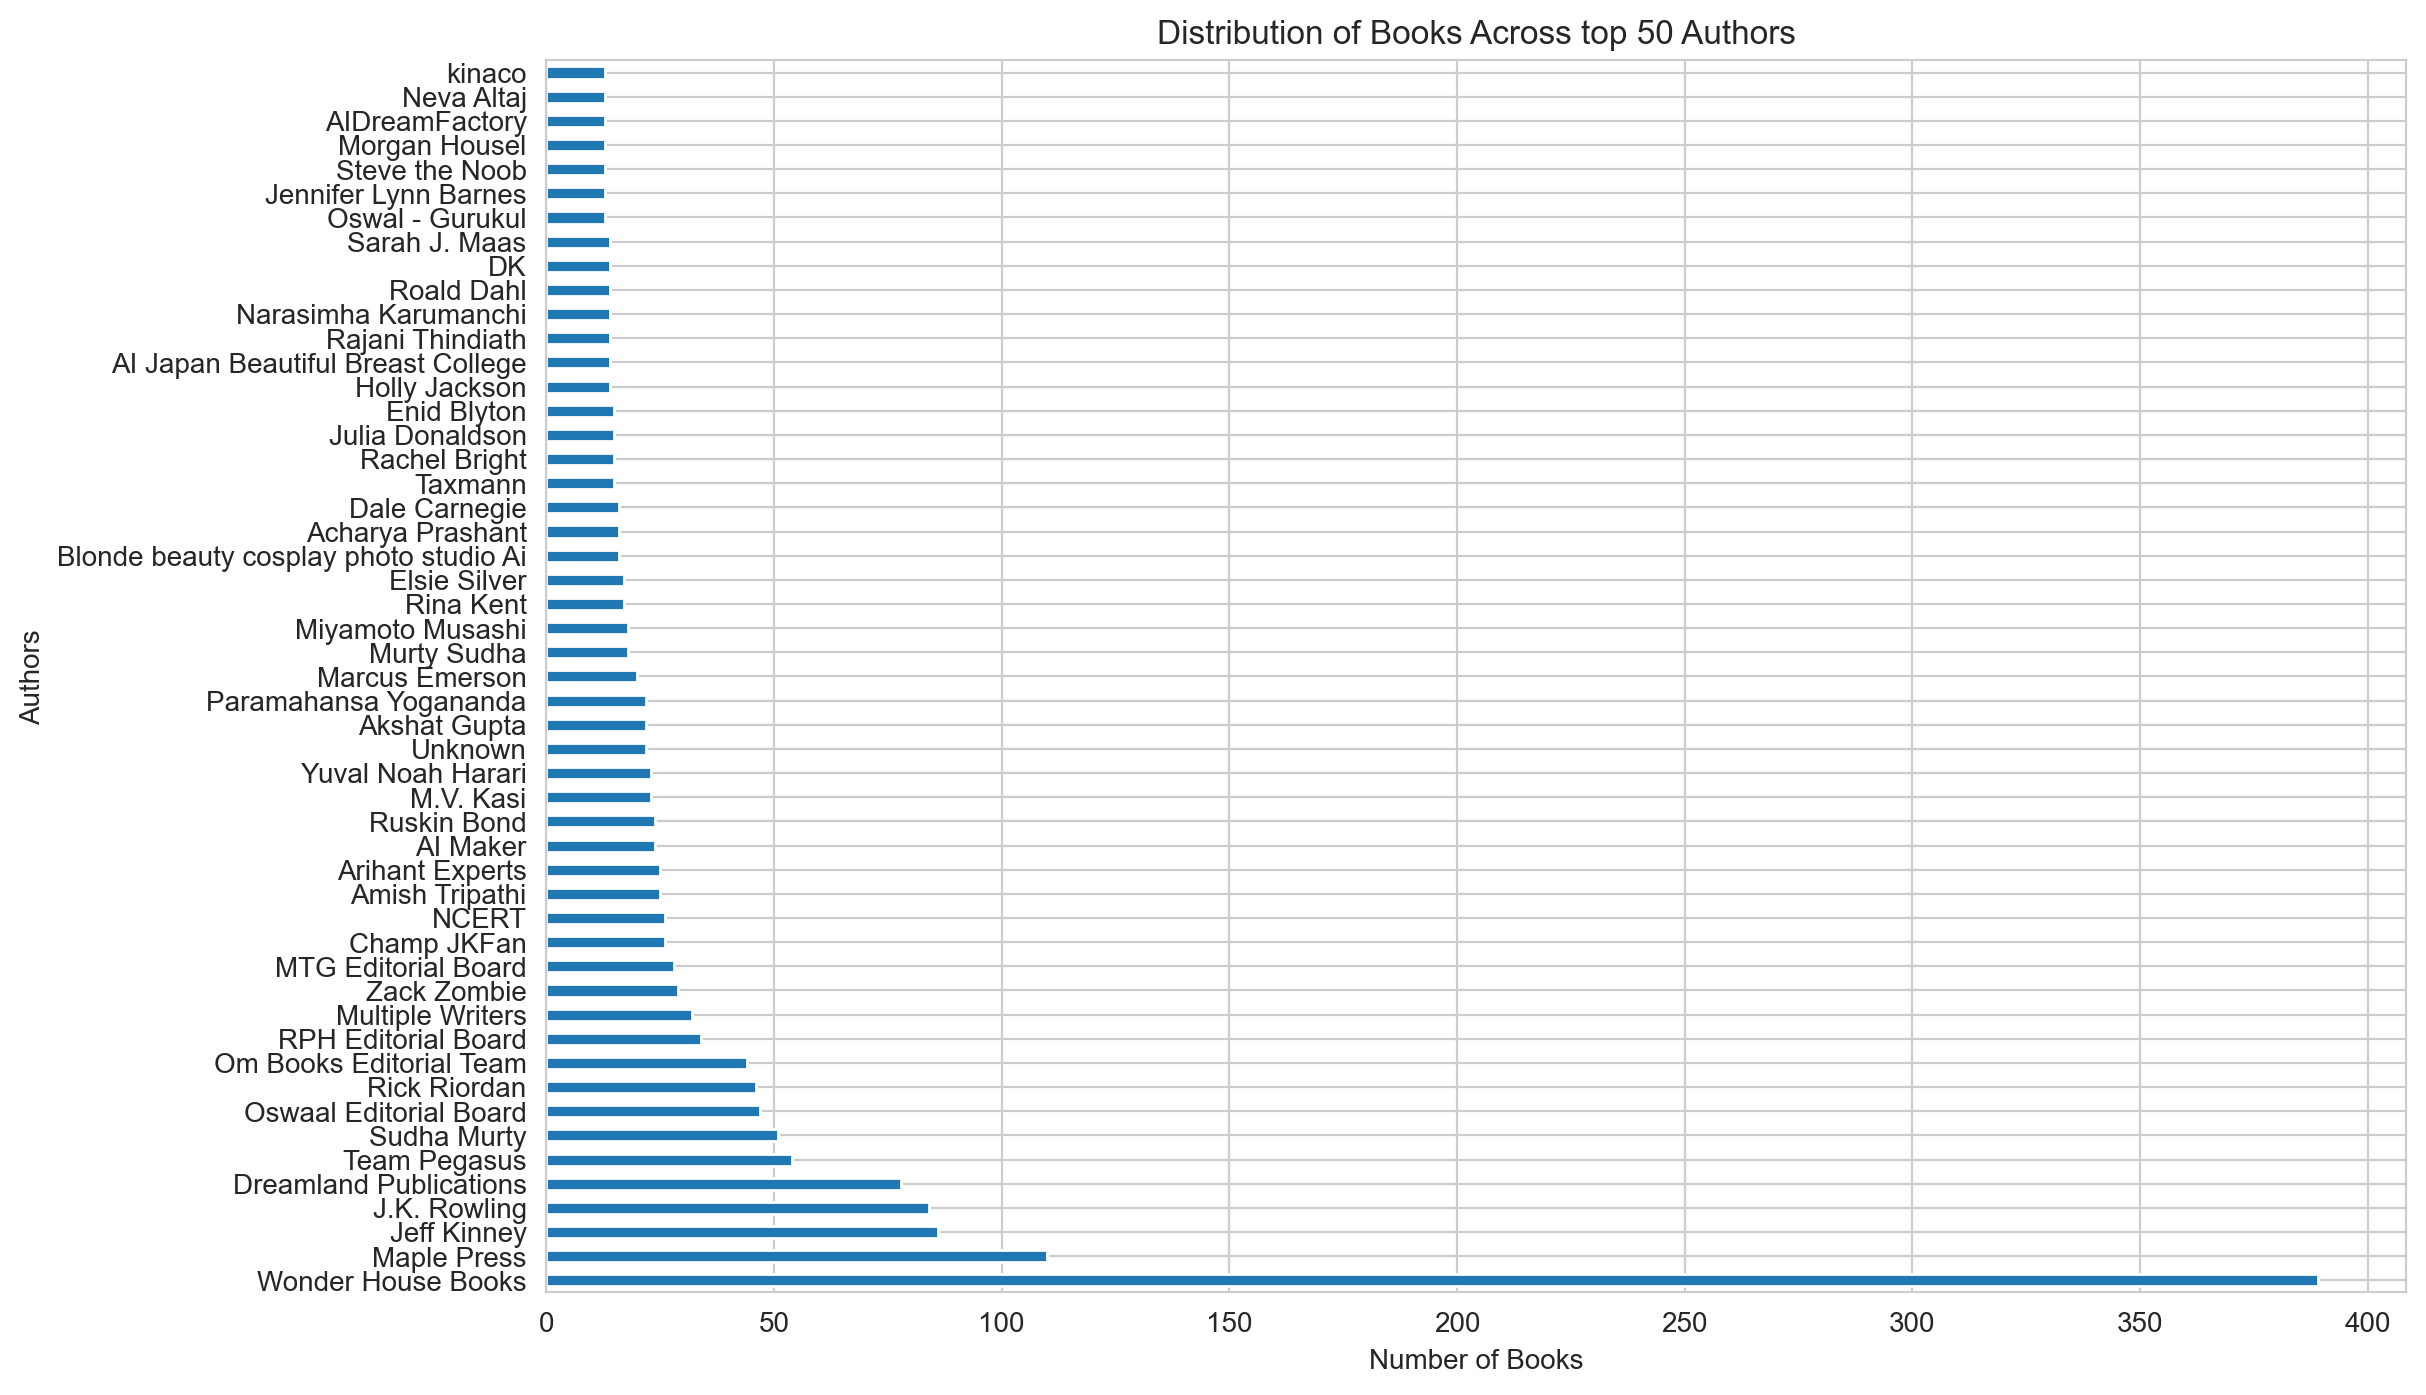

In [21]:
# Distribution of books across different Main Genres
plt.figure(figsize=(12, 8), dpi=200)
df_book['Main Genre'].value_counts().plot(kind='barh')
plt.title('Distribution of Books Across Main Genres')
plt.xlabel('Number of Books')
plt.ylabel('Main Genre')
plt.show()

# Distribution of books across different Main Genres
plt.figure(figsize=(12, 8), dpi=200)
df_book['Type'].value_counts().plot(kind='barh')
plt.title('Distribution of Books Across Book Types')
plt.xlabel('Number of Books')
plt.ylabel('Main Genre')
plt.show()


plt.figure(figsize=(12, 8), dpi=200)
df_book["Author"].value_counts(ascending=False)[0:51].plot(kind='barh')
plt.title('Distribution of Books Across top 50 Authors')
plt.xlabel('Number of Books')
plt.ylabel('Authors')
plt.show()


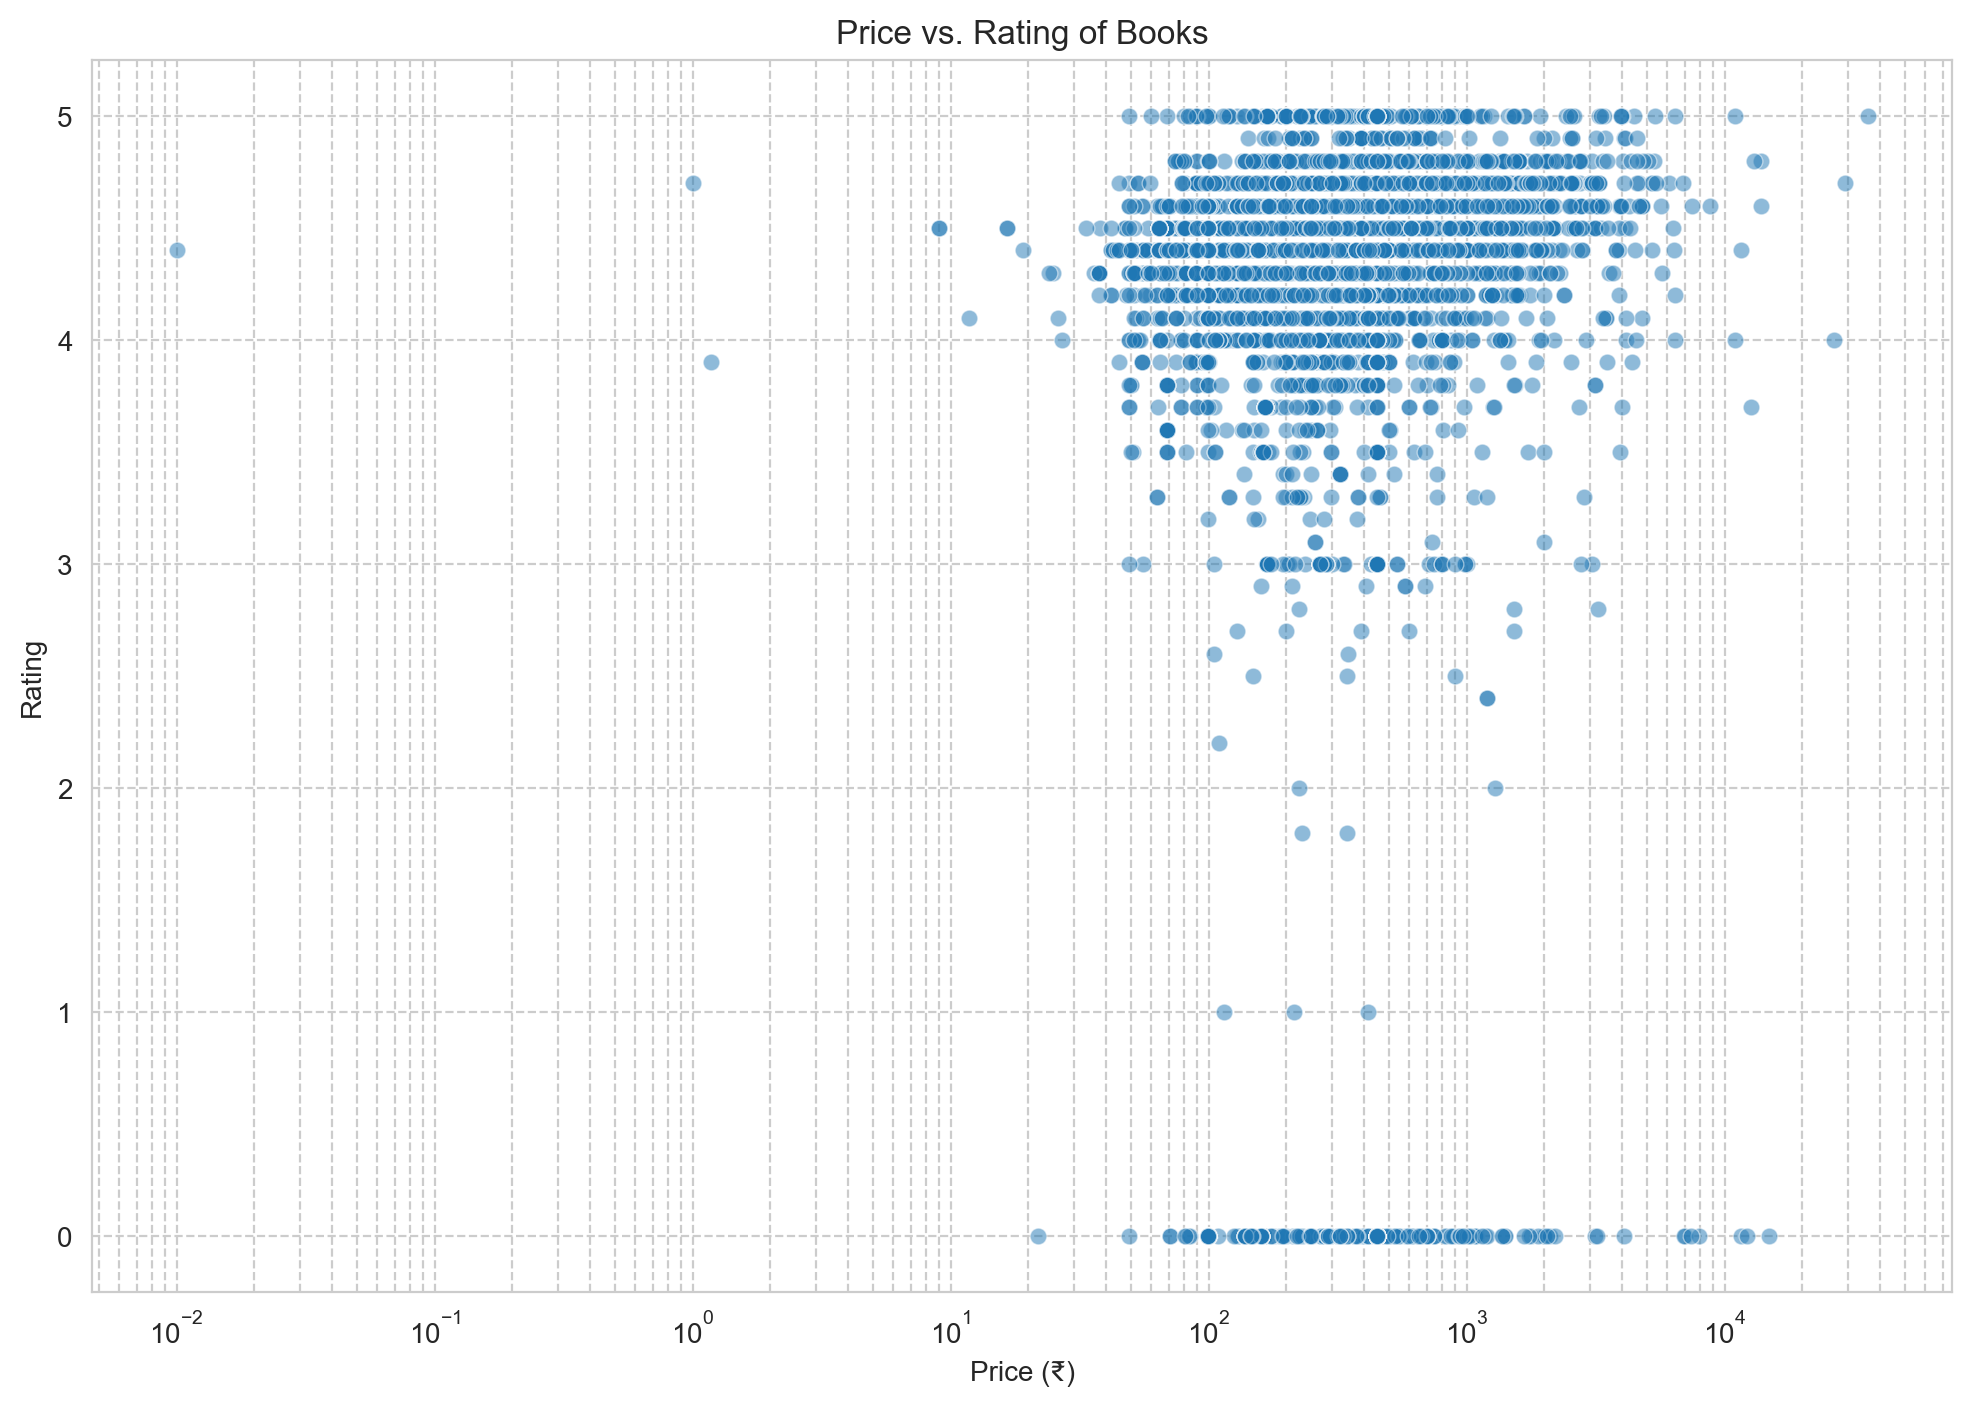

In [22]:
# Price vs. Rating Scatter Plot
plt.figure(figsize=(12, 8), dpi=200)
sns.scatterplot(x='Price', y='Rating', data=df_book, alpha=0.5)
plt.title('Price vs. Rating of Books')
plt.xlabel('Price (₹)')
plt.ylabel('Rating')
plt.xscale('log')  # Using a logarithmic scale for better visualization of a wide range of prices
plt.grid(True, which="both", ls="--")
plt.show()


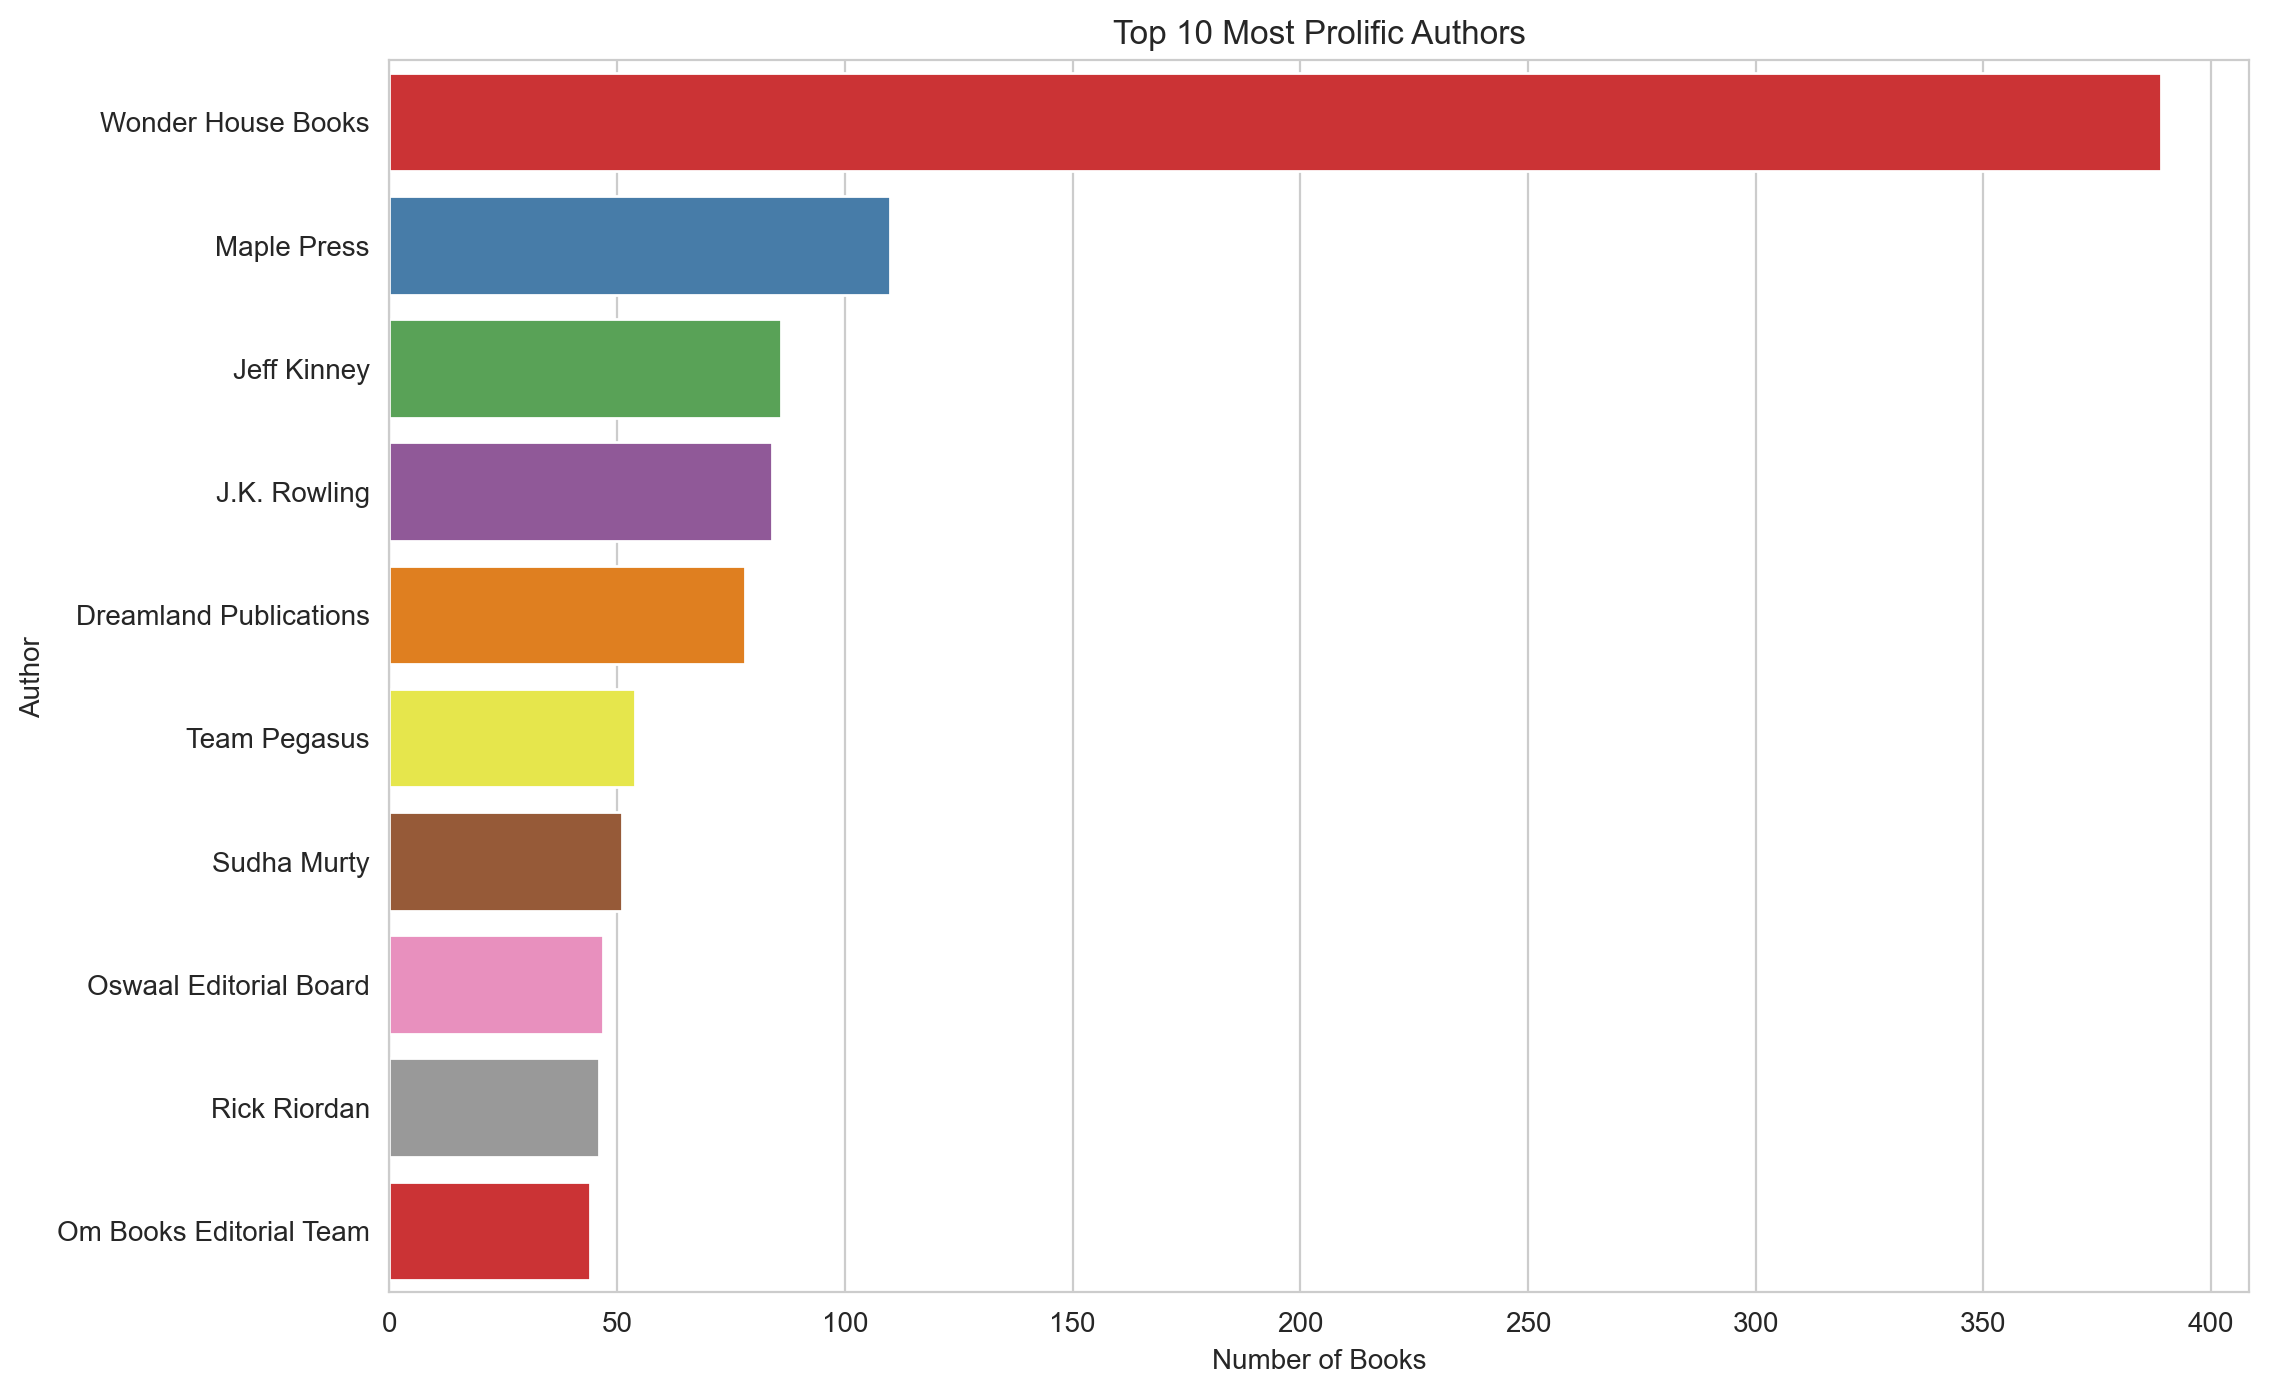

In [23]:
# Count the number of books per author
books_per_author = df_book['Author'].value_counts().reset_index()
books_per_author.columns = ['Author', 'Number of Books']

# Take the top 10 most prolific authors for visualization
top_authors = books_per_author.head(10)

# Visualization
plt.figure(figsize=(12, 8), dpi=200)
sns.barplot(x='Number of Books', y='Author', data=top_authors, palette='Set1')
plt.title('Top 10 Most Prolific Authors')
plt.xlabel('Number of Books')
plt.ylabel('Author')
plt.show()


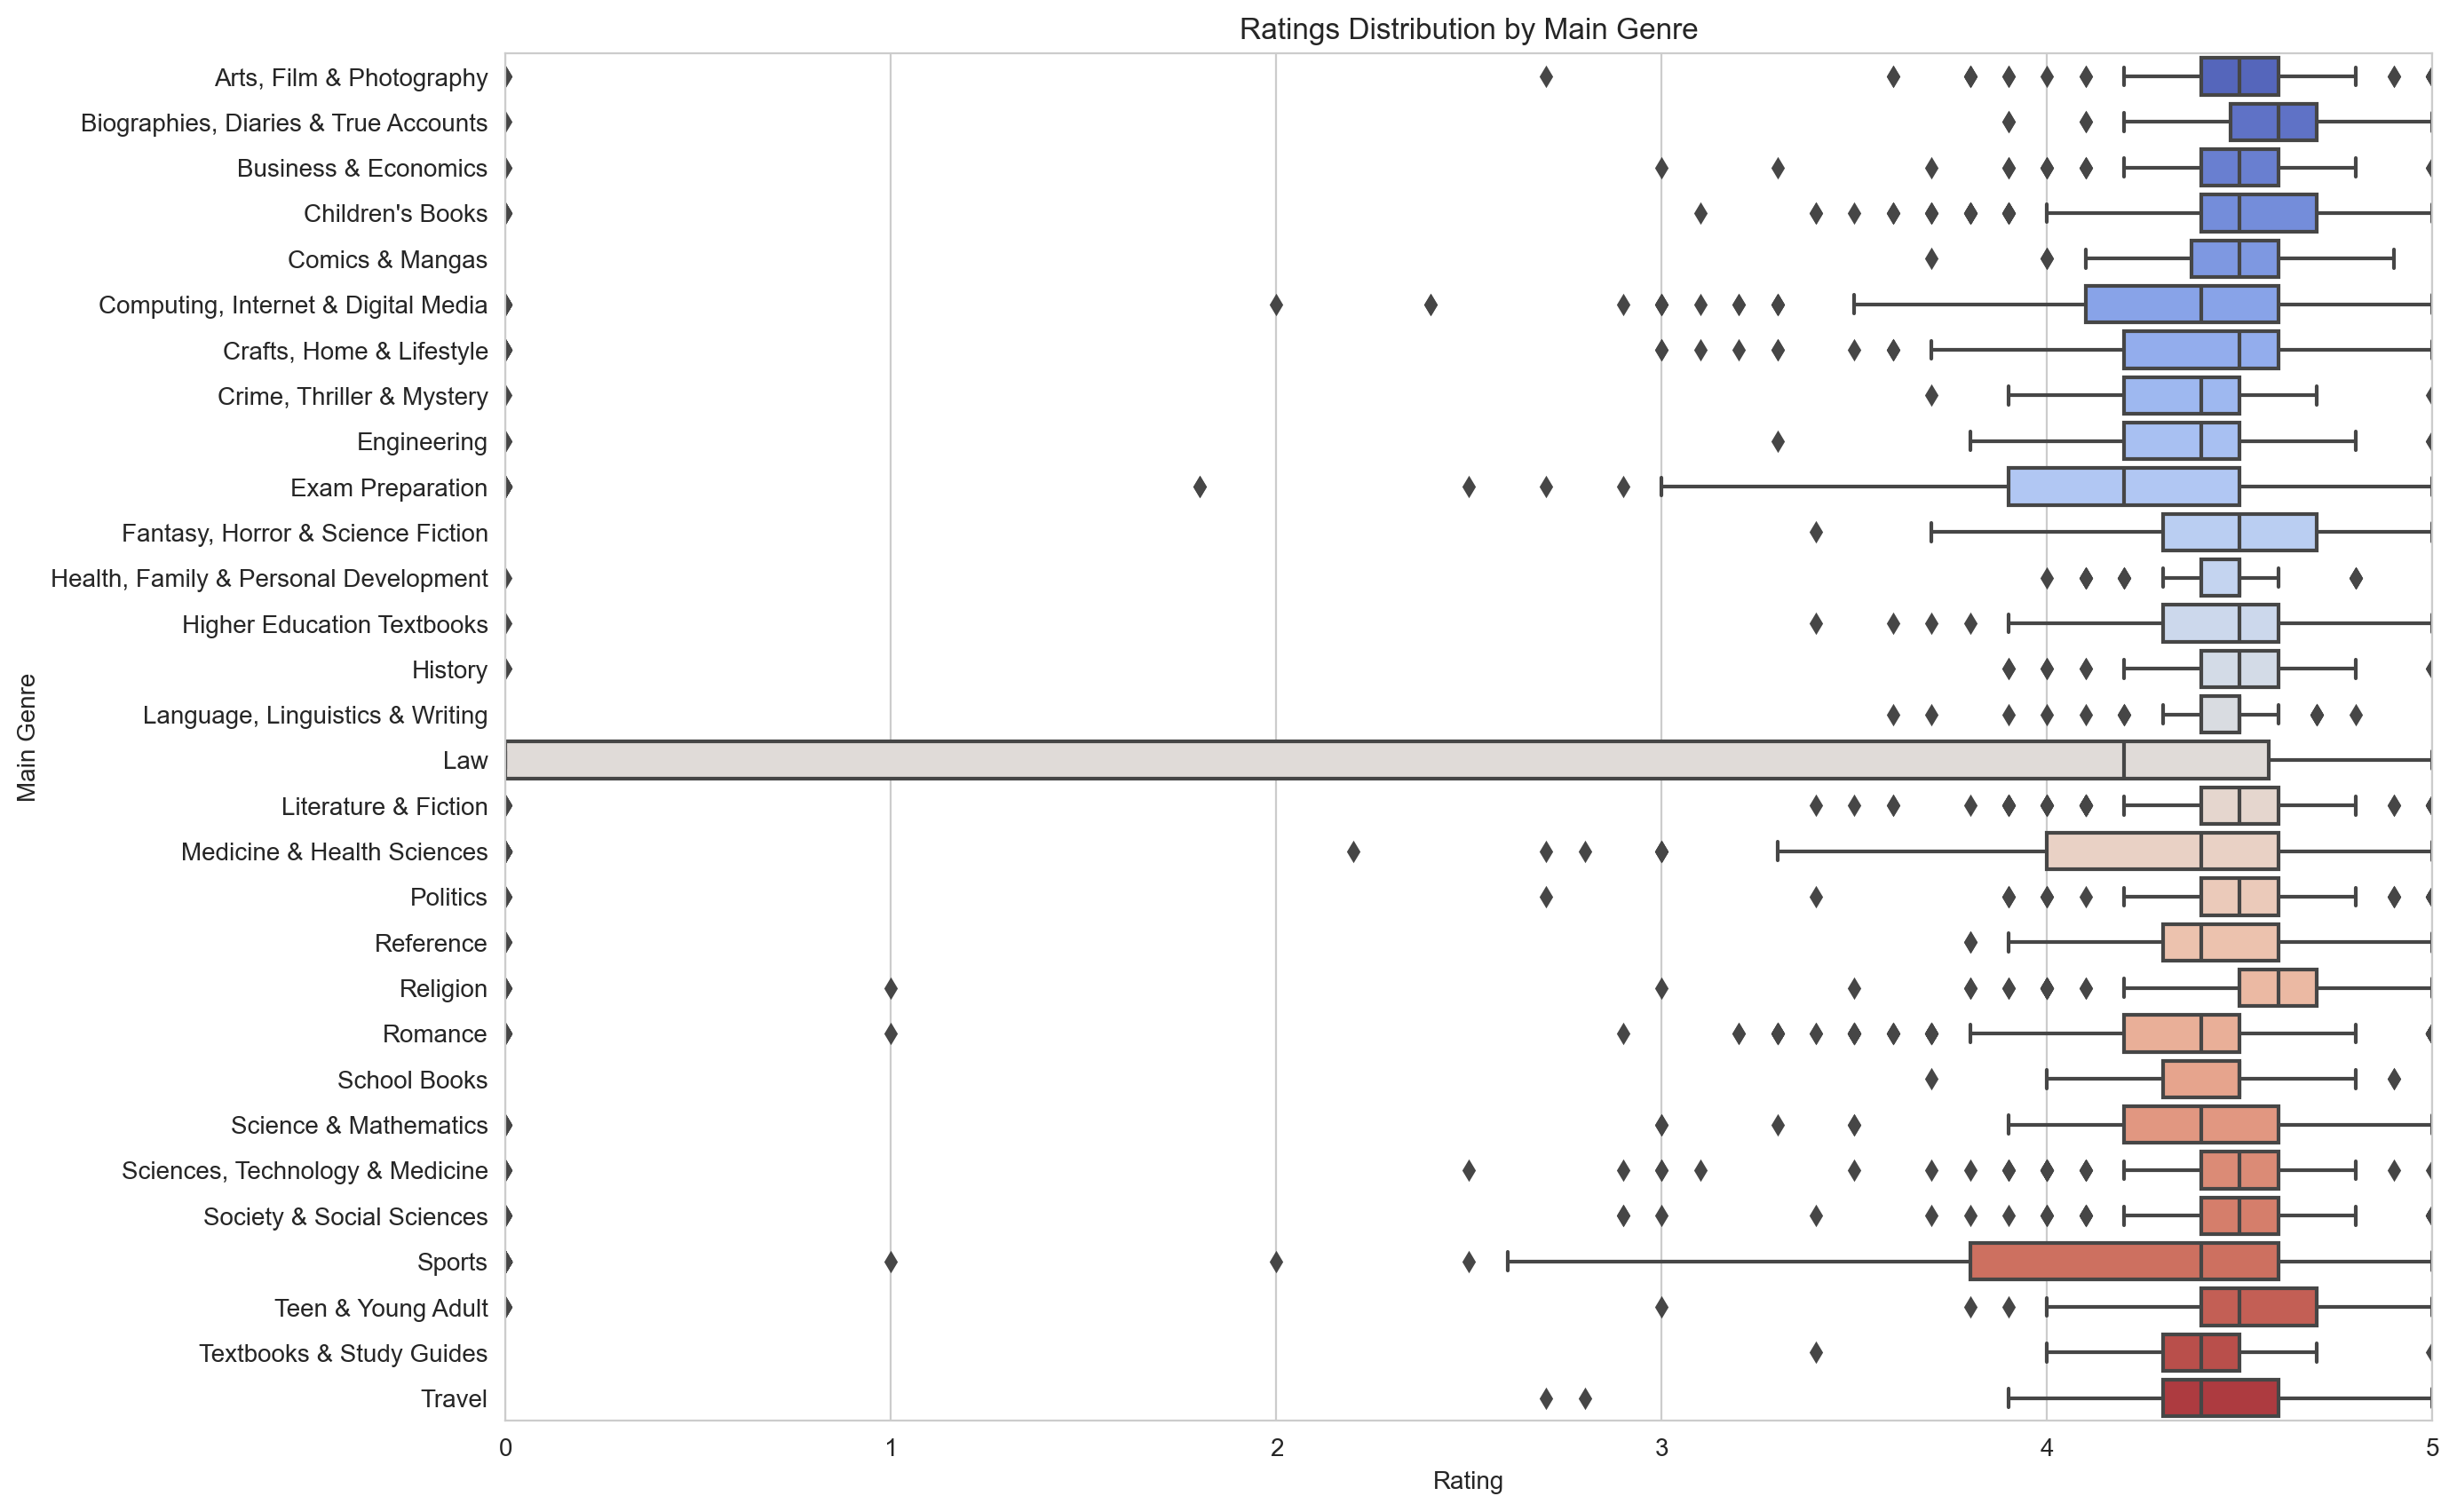

In [24]:
plt.figure(figsize=(14, 10), dpi=200)
sns.boxplot(y='Main Genre', x='Rating', data=df_book, palette="coolwarm")
plt.title('Ratings Distribution by Main Genre')
plt.xlabel('Rating')
plt.ylabel('Main Genre')
plt.xlim(0, 5)  # Ratings are on a scale from 0 to 5
plt.show()

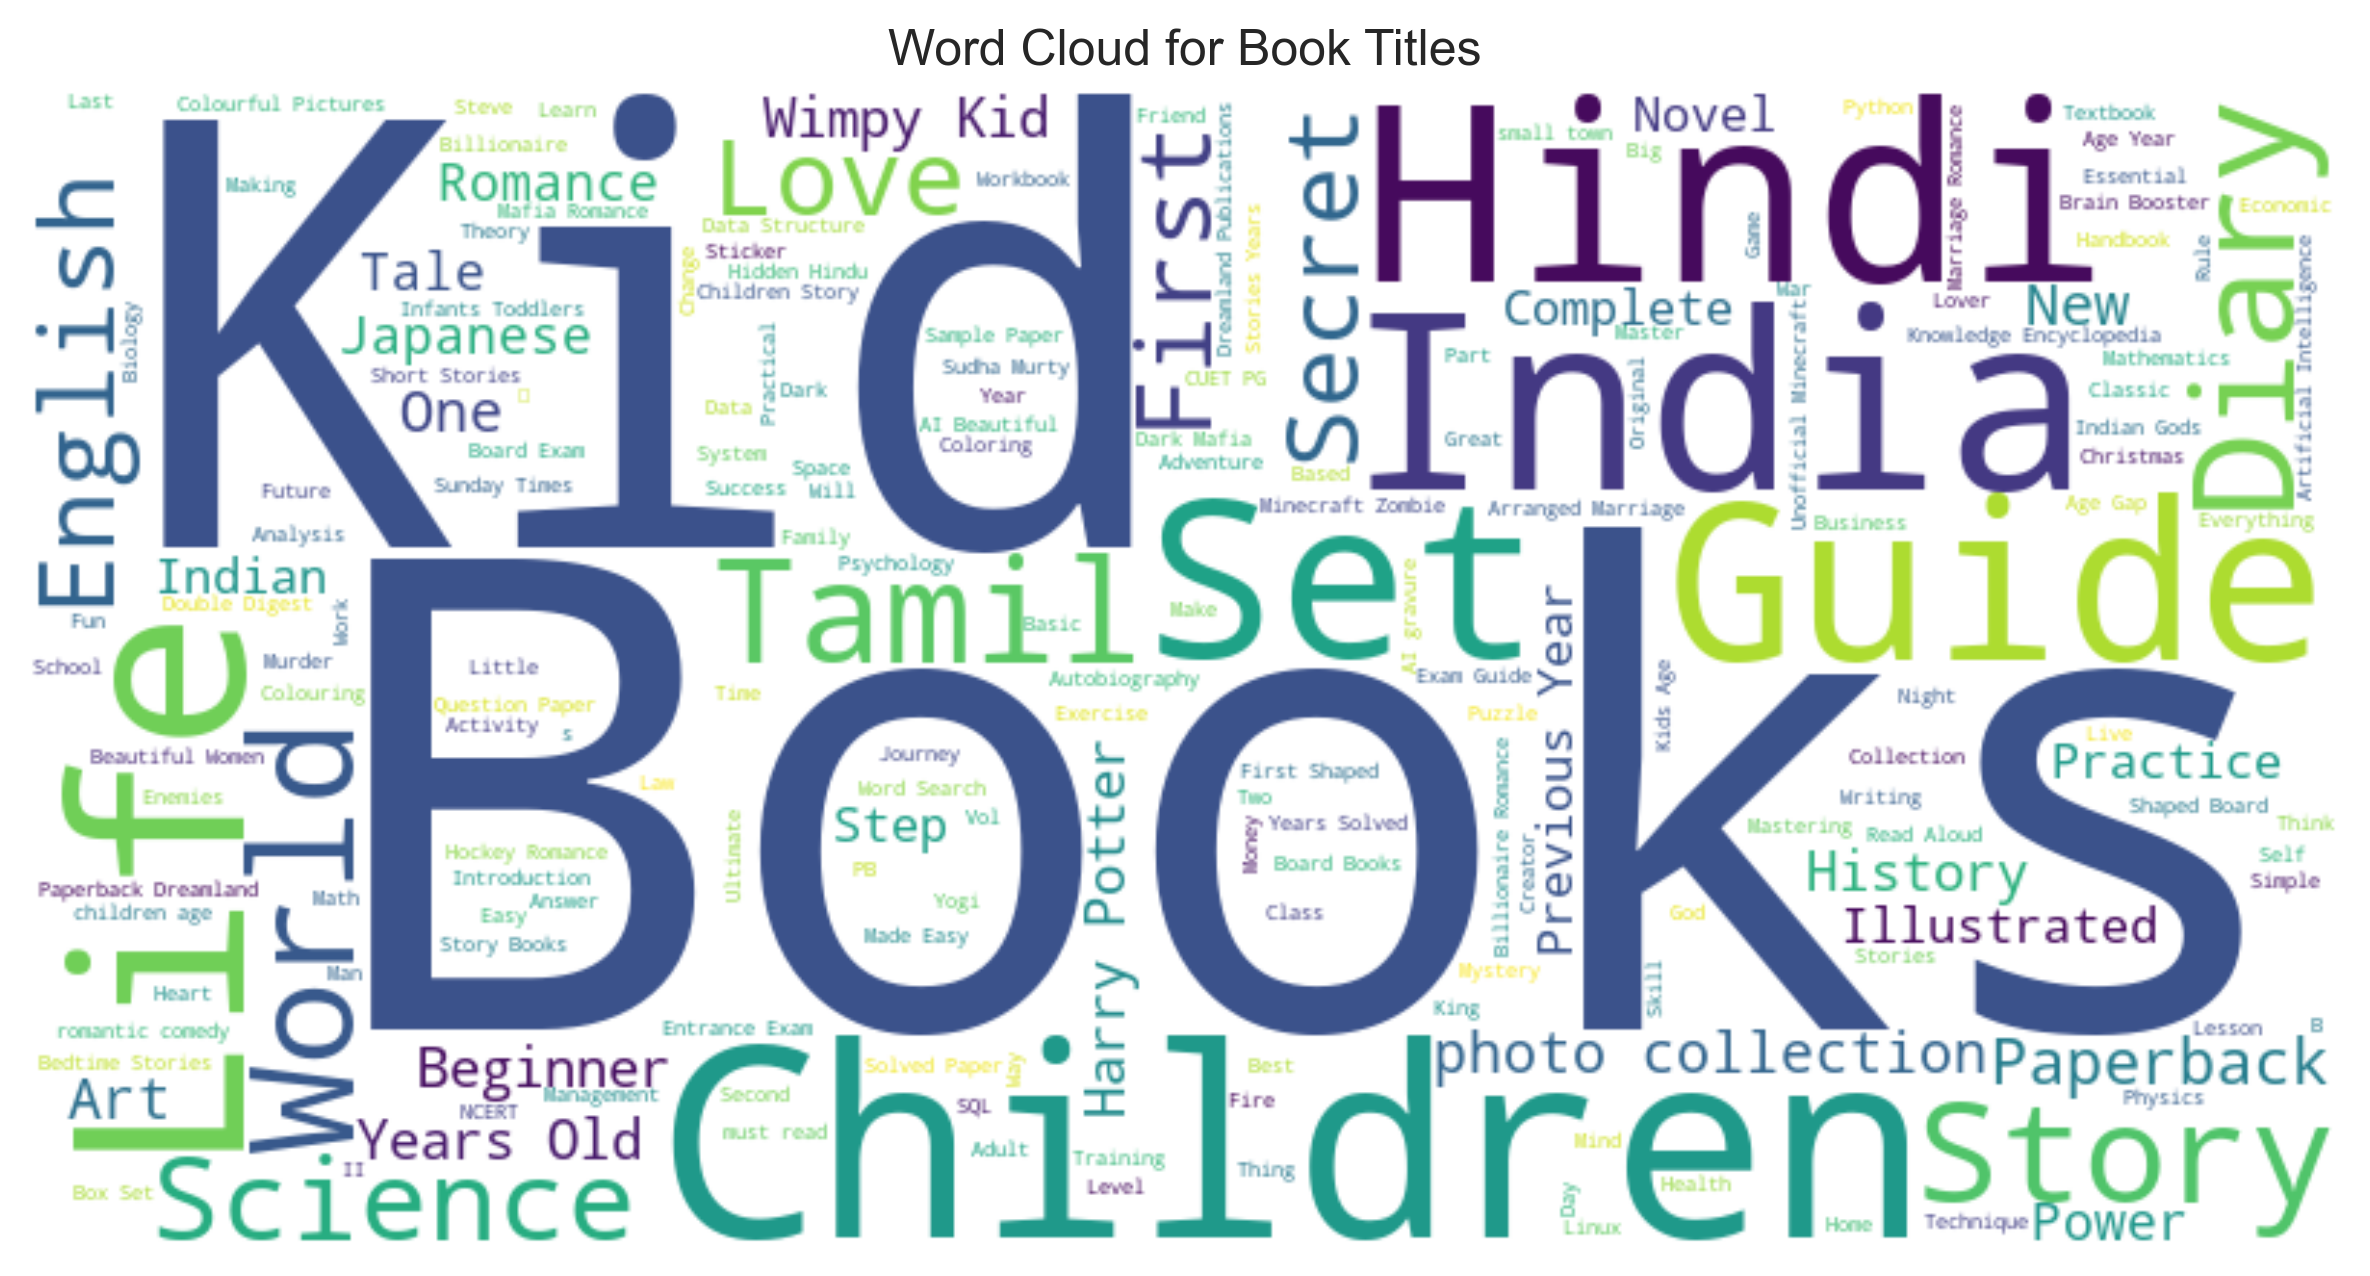

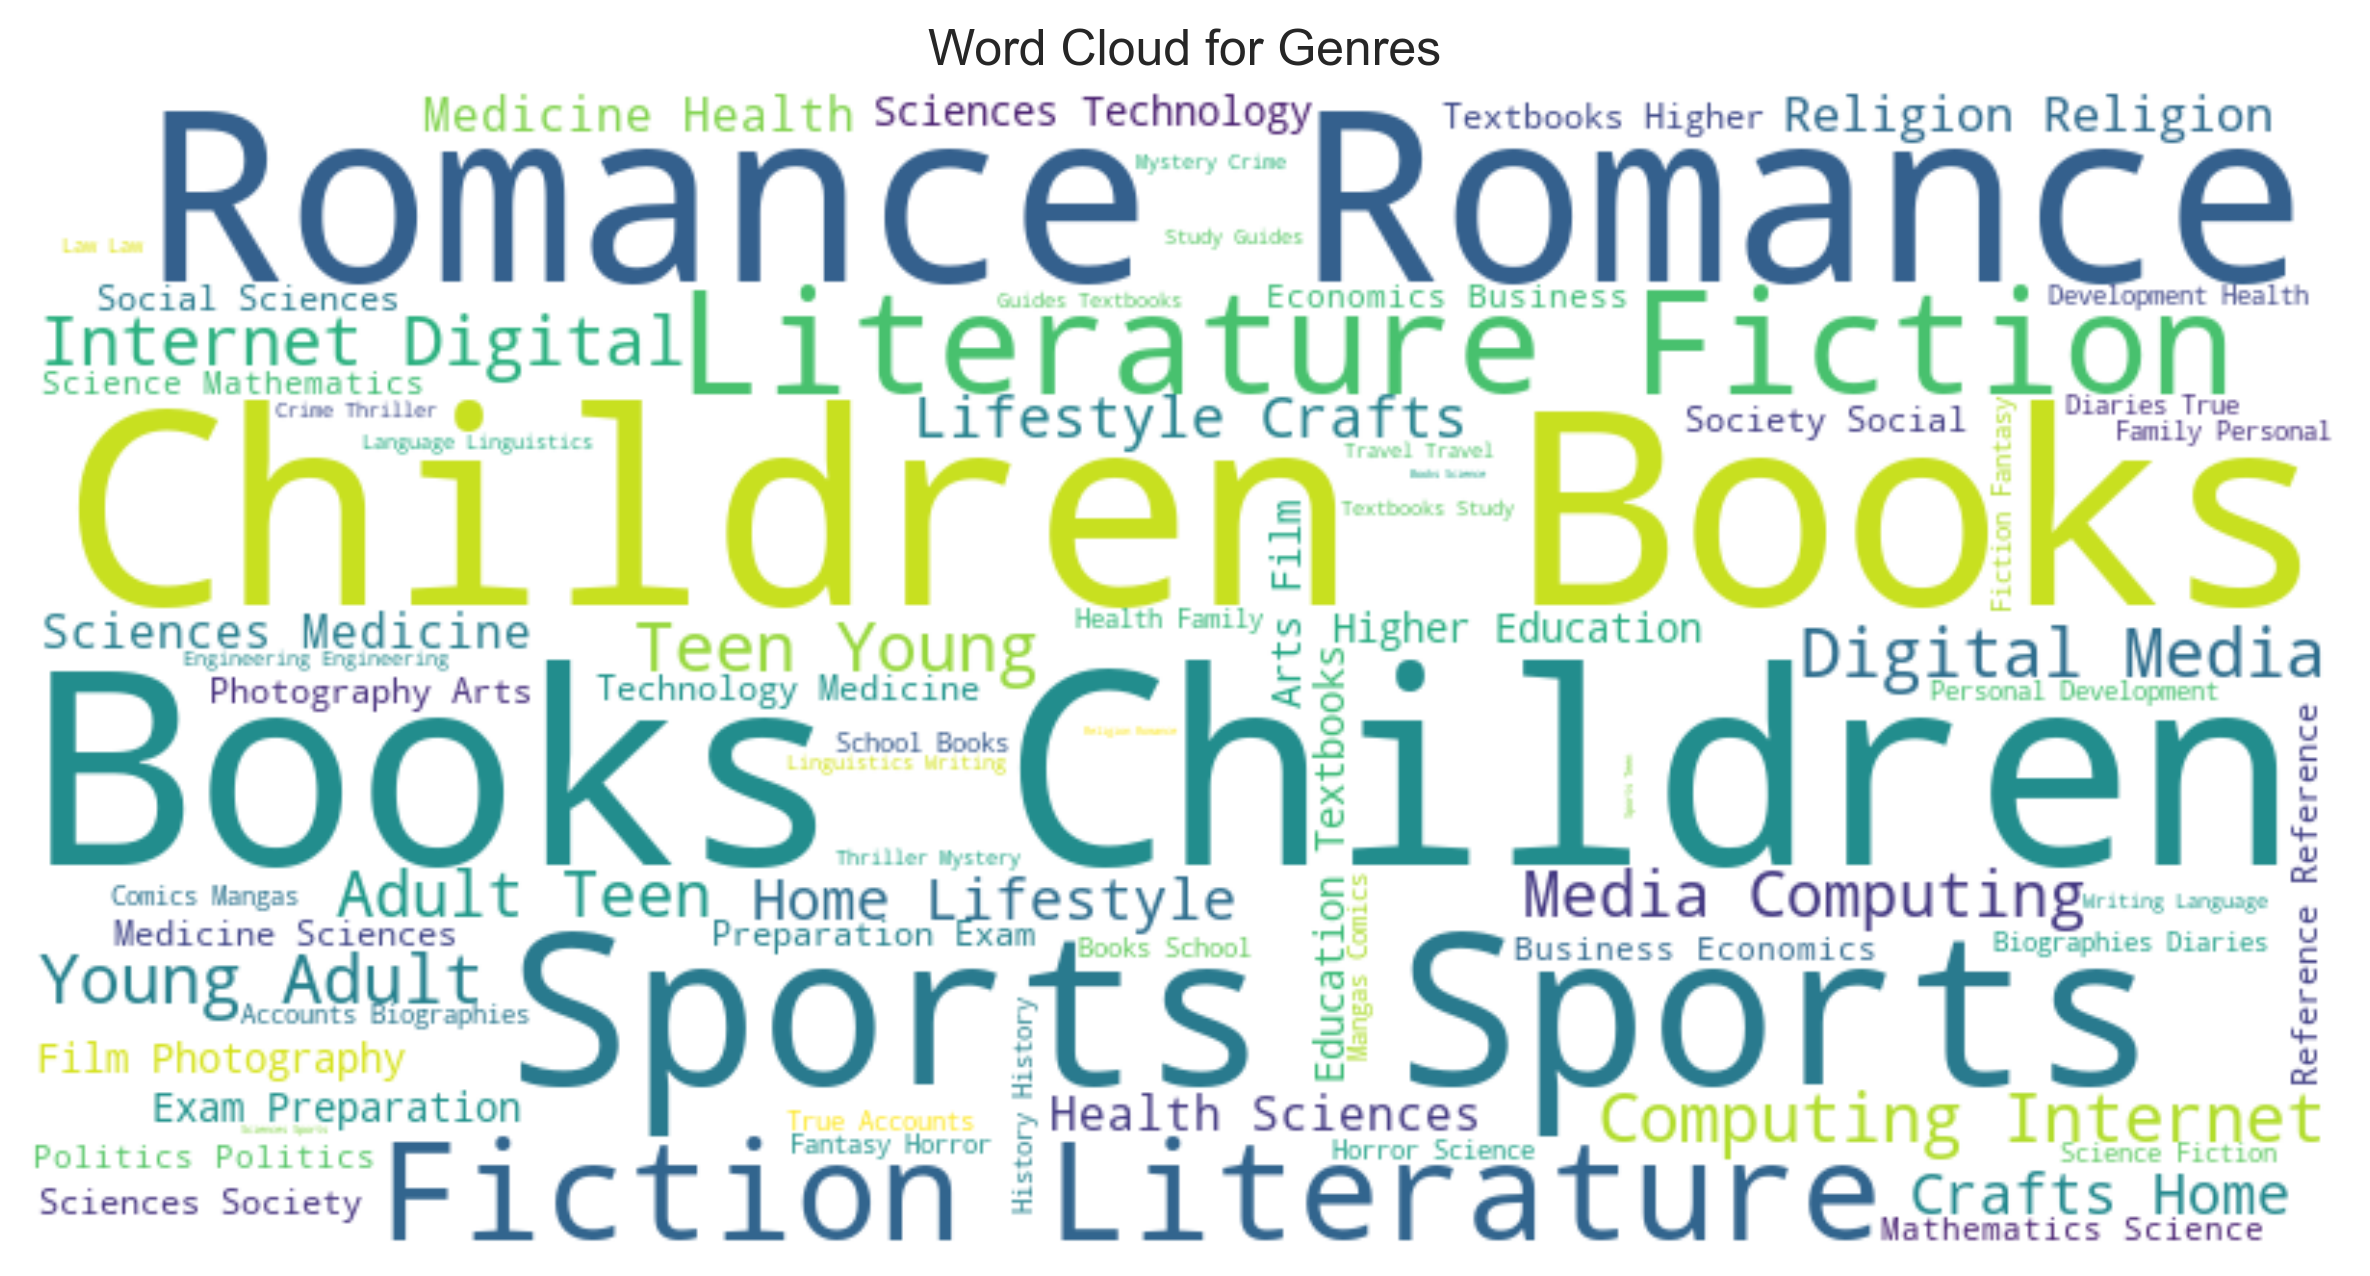

In [25]:
# Combine all book titles into a single string
all_titles = ' '.join(df_book['Title'])

# Combine all genres into a single string
all_genres = ' '.join(df_book['Main Genre'])

# Define additional stopwords to exclude common words that may not add value to the visualization
additional_stopwords = {'Edition', 'Volume', 'Series', 'Book'}

# Update the stopwords set with the additional stopwords
stopwords = set(STOPWORDS).union(additional_stopwords)

# Generate a word cloud for book titles
wordcloud_titles = WordCloud(stopwords=stopwords, background_color='white', width=800, height=400).generate(all_titles)

# Generate a word cloud for genres
wordcloud_genres = WordCloud(stopwords=stopwords, background_color='white', width=800, height=400).generate(all_genres)

# Plotting the word cloud for book titles
plt.figure(figsize=(10, 5), dpi=300)
plt.imshow(wordcloud_titles, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Book Titles')
plt.show()

# Plotting the word cloud for genres
plt.figure(figsize=(10, 5), dpi=300)
plt.imshow(wordcloud_genres, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Genres')
plt.show()


In [26]:
df_book.to_csv("BOOKS.csv",index=False)
#WE CONTINUE OUR VISUALIZATION ON POWER BI

# CLUSTERING ALGORITHM

In [27]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [28]:
features = df_book[['Price', 'Rating', 'No. of People rated']] ## Step 1: Feature Selection - 
#Selecting Price, Rating, and No. of People rated for clustering


In [29]:
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

In [30]:
# Choosing the number of clusters (k) - Elbow Method
wcss = []  # Within-cluster sum of squares
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(features_scaled)
    wcss.append(kmeans.inertia_)

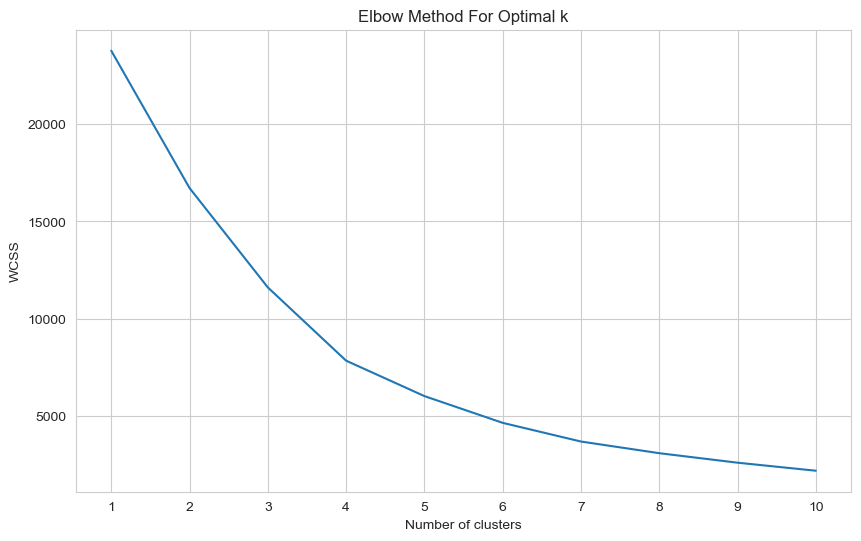

In [31]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')  # Within cluster sum of squares
plt.xticks(np.arange(1, 11, 1))
plt.grid(True)
plt.show()

In [32]:
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=0)
cluster_labels = kmeans.fit_predict(features_scaled)
df_book['Cluster'] = cluster_labels

In [33]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
features_pca = pca.fit_transform(features_scaled)

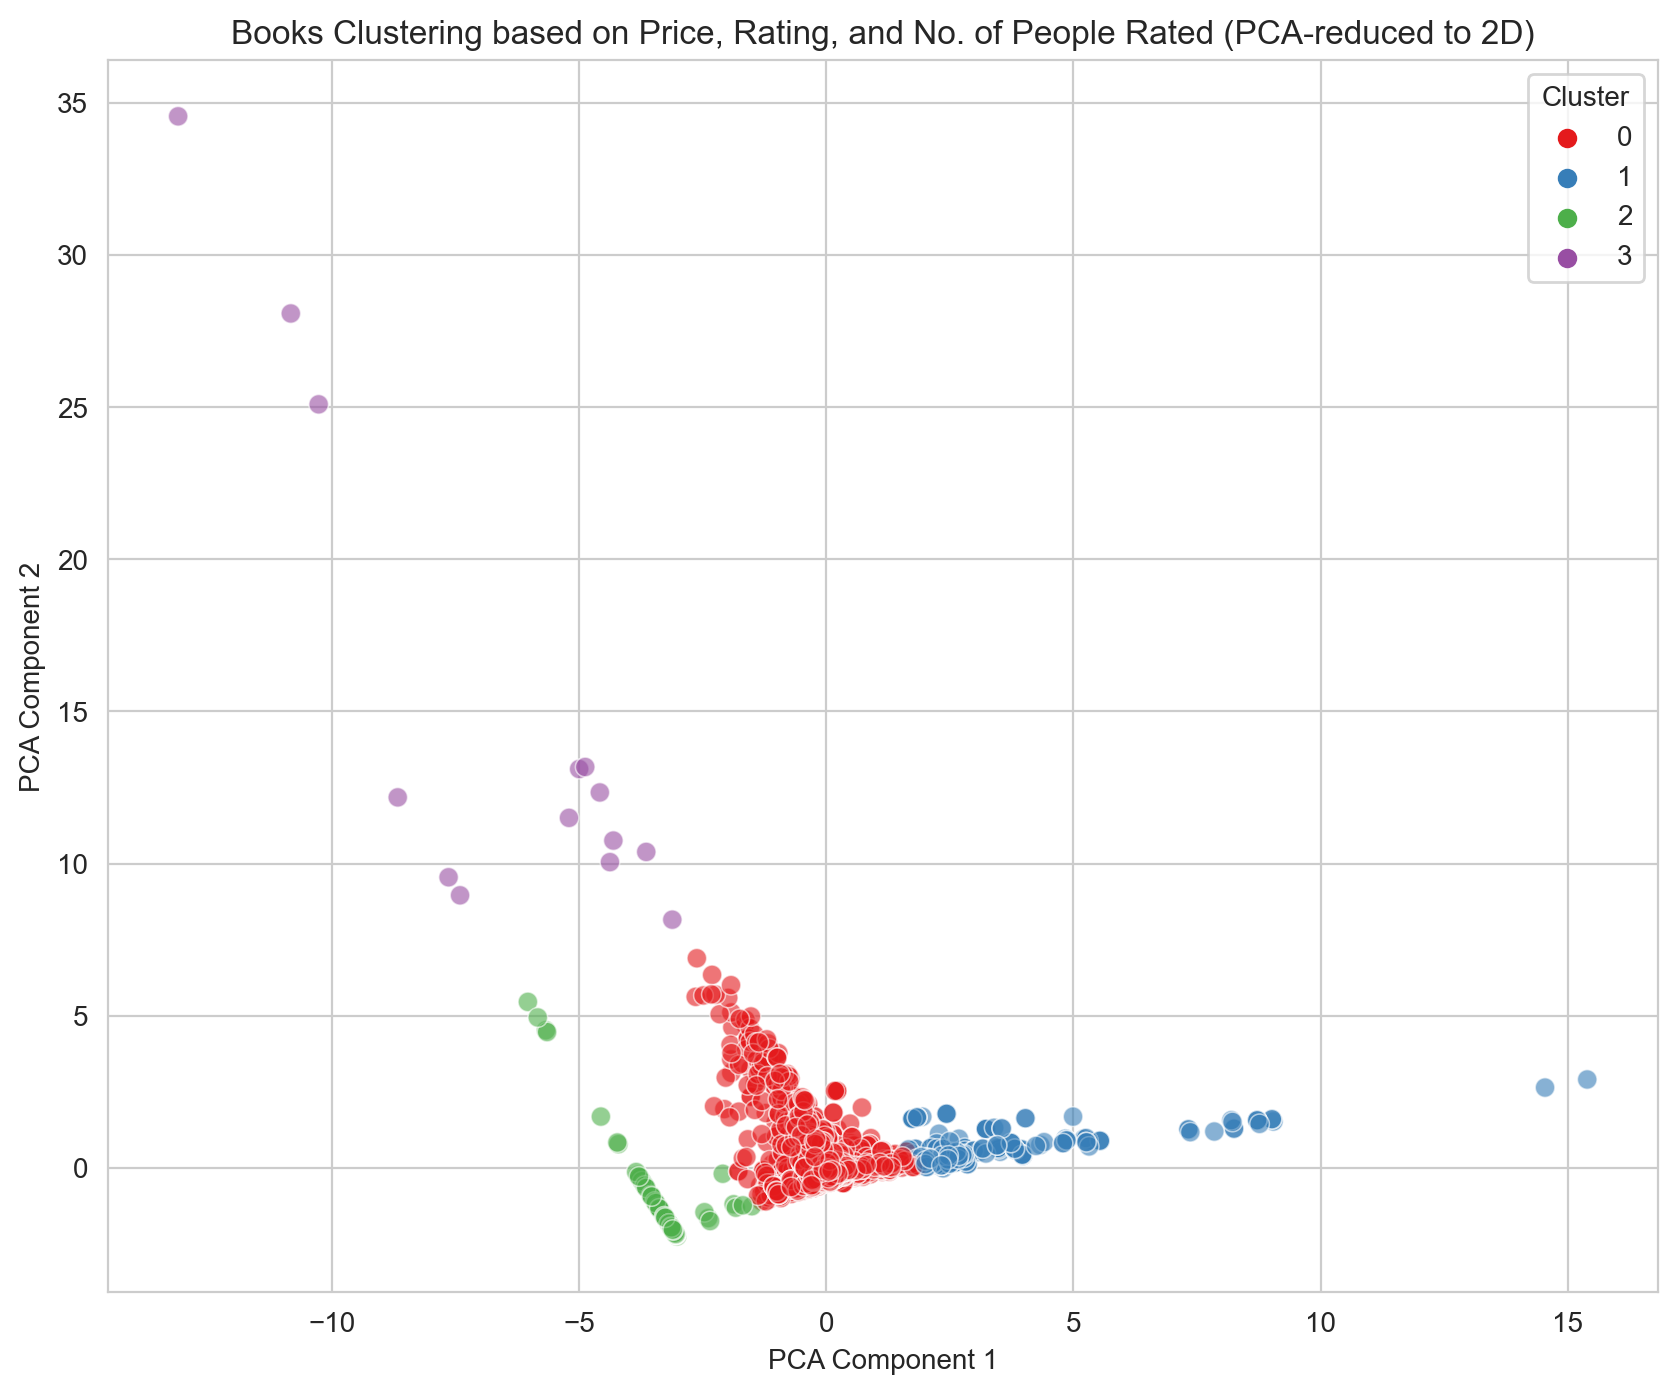

In [34]:
# Scatter plot of the two PCA components colored by cluster label
plt.figure(figsize=(10, 8), dpi=200)
sns.scatterplot(x=features_pca[:, 0], y=features_pca[:, 1], hue=cluster_labels, palette='Set1', s=50, alpha=0.6)
plt.title('Books Clustering based on Price, Rating, and No. of People Rated (PCA-reduced to 2D)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.show()
